In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
color_pal = sb.color_palette()
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
plt.style.use('fivethirtyeight')
from sklearn.metrics import accuracy_score
sb.set()

In this notebook, we want to handle and analyse time series data. We aim to analyse the trends and variables affecting how much bicycles the company needs to supply at different times of the year, month or day, to meet the demand and generate maximum possible profits. Hence, our dataset would need to include data from early years and quarters, which are separate datasets. 

We noticed that the datasets from different years might be different in terms of column names and positions. Cleaning and preparation is hence required before concatenation.

In [2]:
# Earliest data set available, 2016-q3
data_set_quarters = ['2016-q3', '2016-q4', '2017-q1', '2017-q2', '2017-q3', '2017-q4', 
                  '2018-q1', '2018-q2', '2018-q3', '2018-q4', '2019-q1', '2019-q2', '2019-q3', '2019-q4', 
                  '2020-q1', '2020-q2', '2020-q3', '2020-q4', '2021-q1', '2021-q2', '2021-q3', '2021-q4', 
                  '2022-q1', '2022-q2', '2022-q3', '2022-q4', '2023-q1', '2023-q2', '2023-q3', '2023-q4']

df = pd.read_csv('metro-trips-2016-q3.csv')
df.head()

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,1912818,3,7/7/2016 4:17,7/7/2016 4:20,3014,34.056610,-118.23721,3014,34.056610,-118.23721,6281,30,Round Trip,Monthly Pass
1,1919661,33,7/7/2016 6:00,7/7/2016 6:33,3014,34.056610,-118.23721,3014,34.056610,-118.23721,6281,30,Round Trip,Monthly Pass
2,1933383,5,7/7/2016 10:32,7/7/2016 10:37,3016,34.052898,-118.24156,3016,34.052898,-118.24156,5861,365,Round Trip,Flex Pass
3,1944197,181,7/7/2016 10:37,7/7/2016 13:38,3016,34.052898,-118.24156,3016,34.052898,-118.24156,5861,365,Round Trip,Flex Pass
4,1940317,7,7/7/2016 12:51,7/7/2016 12:58,3032,34.049889,-118.25588,3032,34.049889,-118.25588,6674,0,Round Trip,Walk-up


Interestingly, noticed that there was a change in the column name containing the start_staion_id and end_station_id in 2016-Q4, and it was again start_staion_id in 2017-Q1, finally the columns were consistent as start_station and end_station from 2017-Q2

In [3]:
df = pd.read_csv('metro-trips-2017-q2.csv')
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,32815764,18,2017-06-25 19:53:00,2017-06-25 20:11:00,3047,34.039982,-118.266403,3005,34.048500,-118.258537,4727,30,One Way,Monthly Pass
1,32821341,25,2017-06-25 20:35:00,2017-06-25 21:00:00,3005,34.048500,-118.258537,3020,34.031052,-118.267090,4727,30,One Way,Monthly Pass
2,31652471,10,2017-06-16 08:41:00,2017-06-16 08:51:00,3023,34.050911,-118.240967,3005,34.048500,-118.258537,4727,30,One Way,Monthly Pass
3,31700167,4,2017-06-16 17:39:00,2017-06-16 17:43:00,3005,34.048500,-118.258537,3051,34.045422,-118.253517,4727,30,One Way,Monthly Pass
4,31717085,17,2017-06-16 20:17:00,2017-06-16 20:34:00,3051,34.045422,-118.253517,3005,34.048500,-118.258537,4727,0,One Way,Walk-up


Also, in 2019, the bike_type data was introduced

In [4]:
df = pd.read_csv('metro-trips-2019-q1.csv')
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard
3,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard
4,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard


# Preparation of datasets for concatenation
Here, we will combine the datasets from 2016-Q3 and 2017-Q1, then add the remaining data to it. We understand that the data will is not sorted based on time for now, but we will do that subsequently

In [5]:
data_set_quarters1 = ['2016-q3', '2017-q1']

data_set_quarters2 = ['2016-q4', '2017-q2', '2017-q3', '2017-q4',
                      '2018-q1', '2018-q2', '2018-q3', '2018-q4', '2019-q1', '2019-q2', '2019-q3', '2019-q4',
                      '2020-q1', '2020-q2', '2020-q3', '2020-q4', '2021-q1', '2021-q2', '2021-q3', '2021-q4',
                      '2022-q1', '2022-q2', '2022-q3', '2022-q4', '2023-q1', '2023-q2', '2023-q3', '2023-q4']

df_list = []

for quarter in data_set_quarters1:
    df_quarter = pd.read_csv('metro-trips-' + str(quarter) + '.csv')
    df_list.append(df_quarter)

df1 = pd.concat(df_list, ignore_index=False)

df1 = df1.rename(
    mapper={'start_station_id': 'start_station',
            'end_station_id': 'end_station'},
    axis=1)

df1.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,1912818,3,7/7/2016 4:17,7/7/2016 4:20,3014,34.056610,-118.23721,3014,34.056610,-118.23721,6281,30.0,Round Trip,Monthly Pass
1,1919661,33,7/7/2016 6:00,7/7/2016 6:33,3014,34.056610,-118.23721,3014,34.056610,-118.23721,6281,30.0,Round Trip,Monthly Pass
2,1933383,5,7/7/2016 10:32,7/7/2016 10:37,3016,34.052898,-118.24156,3016,34.052898,-118.24156,5861,365.0,Round Trip,Flex Pass
3,1944197,181,7/7/2016 10:37,7/7/2016 13:38,3016,34.052898,-118.24156,3016,34.052898,-118.24156,5861,365.0,Round Trip,Flex Pass
4,1940317,7,7/7/2016 12:51,7/7/2016 12:58,3032,34.049889,-118.25588,3032,34.049889,-118.25588,6674,0.0,Round Trip,Walk-up


In [6]:
df_list = []

for quarter in data_set_quarters2:
    df_quarter = pd.read_csv('metro-trips-' + str(quarter) + '.csv')
    df_list.append(df_quarter)
    
df2 = pd.concat(df_list, ignore_index = False)

new_df = pd.concat([df1, df2], ignore_index=True)
new_df.head()

/var/folders/hx/0wt7j0md7ld6cq4m77bhf6w80000gn/T/ipykernel_19323/1730849859.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_quarter = pd.read_csv('metro-trips-' + str(quarter) + '.csv')
/var/folders/hx/0wt7j0md7ld6cq4m77bhf6w80000gn/T/ipykernel_19323/1730849859.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_quarter = pd.read_csv('metro-trips-' + str(quarter) + '.csv')
/var/folders/hx/0wt7j0md7ld6cq4m77bhf6w80000gn/T/ipykernel_19323/1730849859.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_quarter = pd.read_csv('metro-trips-' + str(quarter) + '.csv')
/var/folders/hx/0wt7j0md7ld6cq4m77bhf6w80000gn/T/ipykernel_19323/1730849859.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_quarter = pd.read_csv('metro-trips-' + str(quarter) + '.csv')


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start station name,end station name
0,1912818,3,7/7/2016 4:17,7/7/2016 4:20,3014,34.056610,-118.23721,3014,34.056610,-118.23721,6281,30.0,Round Trip,Monthly Pass,NaN,NaN,NaN
1,1919661,33,7/7/2016 6:00,7/7/2016 6:33,3014,34.056610,-118.23721,3014,34.056610,-118.23721,6281,30.0,Round Trip,Monthly Pass,NaN,NaN,NaN
2,1933383,5,7/7/2016 10:32,7/7/2016 10:37,3016,34.052898,-118.24156,3016,34.052898,-118.24156,5861,365.0,Round Trip,Flex Pass,NaN,NaN,NaN
3,1944197,181,7/7/2016 10:37,7/7/2016 13:38,3016,34.052898,-118.24156,3016,34.052898,-118.24156,5861,365.0,Round Trip,Flex Pass,NaN,NaN,NaN
4,1940317,7,7/7/2016 12:51,7/7/2016 12:58,3032,34.049889,-118.25588,3032,34.049889,-118.25588,6674,0.0,Round Trip,Walk-up,NaN,NaN,NaN


There are columns here like the final two columns here, 'start station name' and 'end station name' which would not be helpful for any anlysis, we can drop them, along with other columns, but we will leave them for now.

More importantly,
We want to remove rows of data rows consisting of “Virtual Stations”, ID: 3000. It is used by staff to check in or check out a bike remotely for a special event or in a situation in which a bike could not otherwise be checked in or out to a station. Such rows do not provide any information on the number of bikes required at a certain time.

In [7]:
# before cleaning:
print("Number of trips starting from virtual station: " + str((new_df.start_station == 3000).sum()))
print("Number of trips ending at virtual station: " + str((new_df.end_station == 3000).sum()))

Number of trips starting from virtual station: 2220
Number of trips ending at virtual station: 36449


In [8]:
# after cleaning:
new_df = new_df[(new_df.end_station != 3000) & (new_df.start_station != 3000)]
print("Number of trips starting from virtual station: " + str((new_df.start_station == 3000).sum()))
print("Number of trips ending at virtual station: " + str((new_df.end_station == 3000).sum()))

Number of trips starting from virtual station: 0
Number of trips ending at virtual station: 0


# Data Manipulation

Next, we want to manipulate the data provided, and create a new dataframe. Every row will represent either a rental/return based on it's timestamp, so that we can calculate the number of bikes taken from or returned to a particular station, and the number of bikes on the go.

In [9]:
# Converting start_time and end_time to datetime format
new_df['start_time'] = pd.to_datetime(new_df['start_time'], format='mixed')
new_df['end_time'] = pd.to_datetime(new_df['end_time'], format='mixed')

# Creating new dataframe to store timeseries data for starting trips
start_trips = pd.DataFrame()
start_trips['timeStamp'] = new_df.start_time
start_trips['start_or_end'] = 'start'
start_trips['station'] = new_df.start_station

start_trips.head()

,timeStamp,start_or_end,station
0,2016-07-07 04:17:00,start,3014
1,2016-07-07 06:00:00,start,3014
2,2016-07-07 10:32:00,start,3016
3,2016-07-07 10:37:00,start,3016
4,2016-07-07 12:51:00,start,3032


In [10]:
# Creating another dataframe to store timeseries data for returning/ending trips
end_trips = pd.DataFrame()
end_trips['timeStamp'] = new_df.end_time
end_trips['start_or_end'] = 'end'
end_trips['station'] = new_df.end_station
end_trips.head()

,timeStamp,start_or_end,station
0,2016-07-07 04:20:00,end,3014
1,2016-07-07 06:33:00,end,3014
2,2016-07-07 10:37:00,end,3016
3,2016-07-07 13:38:00,end,3016
4,2016-07-07 12:58:00,end,3032


In [11]:
# Concatenating dataframes to store timeseries data for all trips
all_trips = pd.concat([start_trips, end_trips], ignore_index = False)

# we also need sort data based on time stamp (earliest to latest)
all_trips = all_trips.sort_values(by = 'timeStamp', ascending = True)
all_trips.set_index('timeStamp', inplace = True)

all_trips['date'] = all_trips.index.date
all_trips['hour_of_day'] = all_trips.index.hour

all_trips.head()

,start_or_end,station,date,hour_of_day
timeStamp,,,,
2016-07-07 04:17:00,start,3014,2016-07-07,4
2016-07-07 04:20:00,end,3014,2016-07-07,4
2016-07-07 06:00:00,start,3014,2016-07-07,6
2016-07-07 06:33:00,end,3014,2016-07-07,6
2016-07-07 10:32:00,start,3016,2016-07-07,10


# Calculating the number of bikes on the go at every point in time
Such data will be important for the company to understand the utilisation rate of bicycles. In the future, they can estimate the minimum number of bicycles to be supplied, and produce and maintained.

In [12]:
# Every row/ entry represents a bike either returned, or taken away for use from a station
# this allows us to calculate the number of active bikes on the go at every point in time

all_trips['bikes_on_the_go'] = 1 #initialise

all_trips['bikes_on_the_go'] = all_trips['bikes_on_the_go'].where(all_trips['start_or_end'] == 'start', -1)
all_trips['bikes_on_the_go'] = all_trips['bikes_on_the_go'].cumsum()
        
all_trips.head()

,start_or_end,station,date,hour_of_day,bikes_on_the_go
timeStamp,,,,,
2016-07-07 04:17:00,start,3014,2016-07-07,4,1
2016-07-07 04:20:00,end,3014,2016-07-07,4,0
2016-07-07 06:00:00,start,3014,2016-07-07,6,1
2016-07-07 06:33:00,end,3014,2016-07-07,6,0
2016-07-07 10:32:00,start,3016,2016-07-07,10,1


By calculating the number of bikes on the go at every point in time, we can understand/ have a gauge on the minimum number of bikes needed to be supplied by the company, to cope with demand sufficiently to maximise profits. The company would not want to oversupply, as that will incur higher costs. Having close to the 'right' amount of bikes will hence maximise the company's profits.

# Data Truncation/ Generalisation

Because our data is dense with multiple entries per timestamp, processing it becomes overly complex. Therefore, we'll downsample it to simplify analysis, focusing on hourly counts of bikes in transit and station surpluses/deficits. While we may lose some granularity, it's insignificant since our aim is to capture overarching trends, not minute variations. Downsampling streamlines our analysis without compromising the dataset's essence, enabling efficient extraction of meaningful insights.

We will calculate the number of bikes on the go per hour, surplus and deficits at each station per hour.

In [13]:
date_with_hour = {}
for time in all_trips.index:
    date_hour_tuple = (time.date(), time.hour)
    date_with_hour[date_hour_tuple] = True

unique_date_with_hour = list(date_with_hour.keys())

In [14]:
data = []
for date, hour in unique_date_with_hour:
    data.append({'date': date, 'hour_of_day': hour})
hourly_data = pd.DataFrame(data)
hourly_data.head()

,date,hour_of_day
0,2016-07-07,4
1,2016-07-07,6
2,2016-07-07,10
3,2016-07-07,12
4,2016-07-07,13


In [15]:
for column in all_trips.columns:
    if ((column != 'date') & (column != 'hour_of_day') & (column != 'trip_id') & (column != 'station') & (column != 'start_or_end')):
        hourly_data[column] = 0
        
first_bikes_on_the_go = all_trips.groupby(['date', 'hour_of_day'])['bikes_on_the_go'].last()

# Merge first_bikes_on_the_go with hourly_data on 'date' and 'hour_of_day'
hourly_data = hourly_data.merge(first_bikes_on_the_go, left_on=['date', 'hour_of_day'], right_index=True, how='left')

# Insert 'bikes_on_the_go' back to original position and drop redundant columns
hourly_data.insert(3, 'bikes_on_the_go', hourly_data['bikes_on_the_go_y'])
hourly_data.drop(columns=['bikes_on_the_go_x', 'bikes_on_the_go_y'], inplace=True)
hourly_data.head()

,date,hour_of_day,bikes_on_the_go
0,2016-07-07,4,0
1,2016-07-07,6,0
2,2016-07-07,10,1
3,2016-07-07,12,4
4,2016-07-07,13,10


In [16]:
# Convert 'date' column to datetime format
hourly_data['date'] = pd.to_datetime(hourly_data['date'])

# Create a new column for timestamp with hourly intervals
hourly_data['timestamp'] = hourly_data['date'] + pd.to_timedelta(hourly_data['hour_of_day'], unit='h')

# Drop the 'date' column
hourly_data.drop(columns=['date'], inplace=True)

# Reorder the columns to have 'timestamp' as the first column
hourly_data = hourly_data[['timestamp'] + [col for col in hourly_data.columns if col != 'timestamp']]

hourly_data.set_index('timestamp', inplace=True)
hourly_data.head()

,hour_of_day,bikes_on_the_go
timestamp,,
2016-07-07 04:00:00,4,0
2016-07-07 06:00:00,6,0
2016-07-07 10:00:00,10,1
2016-07-07 12:00:00,12,4
2016-07-07 13:00:00,13,10


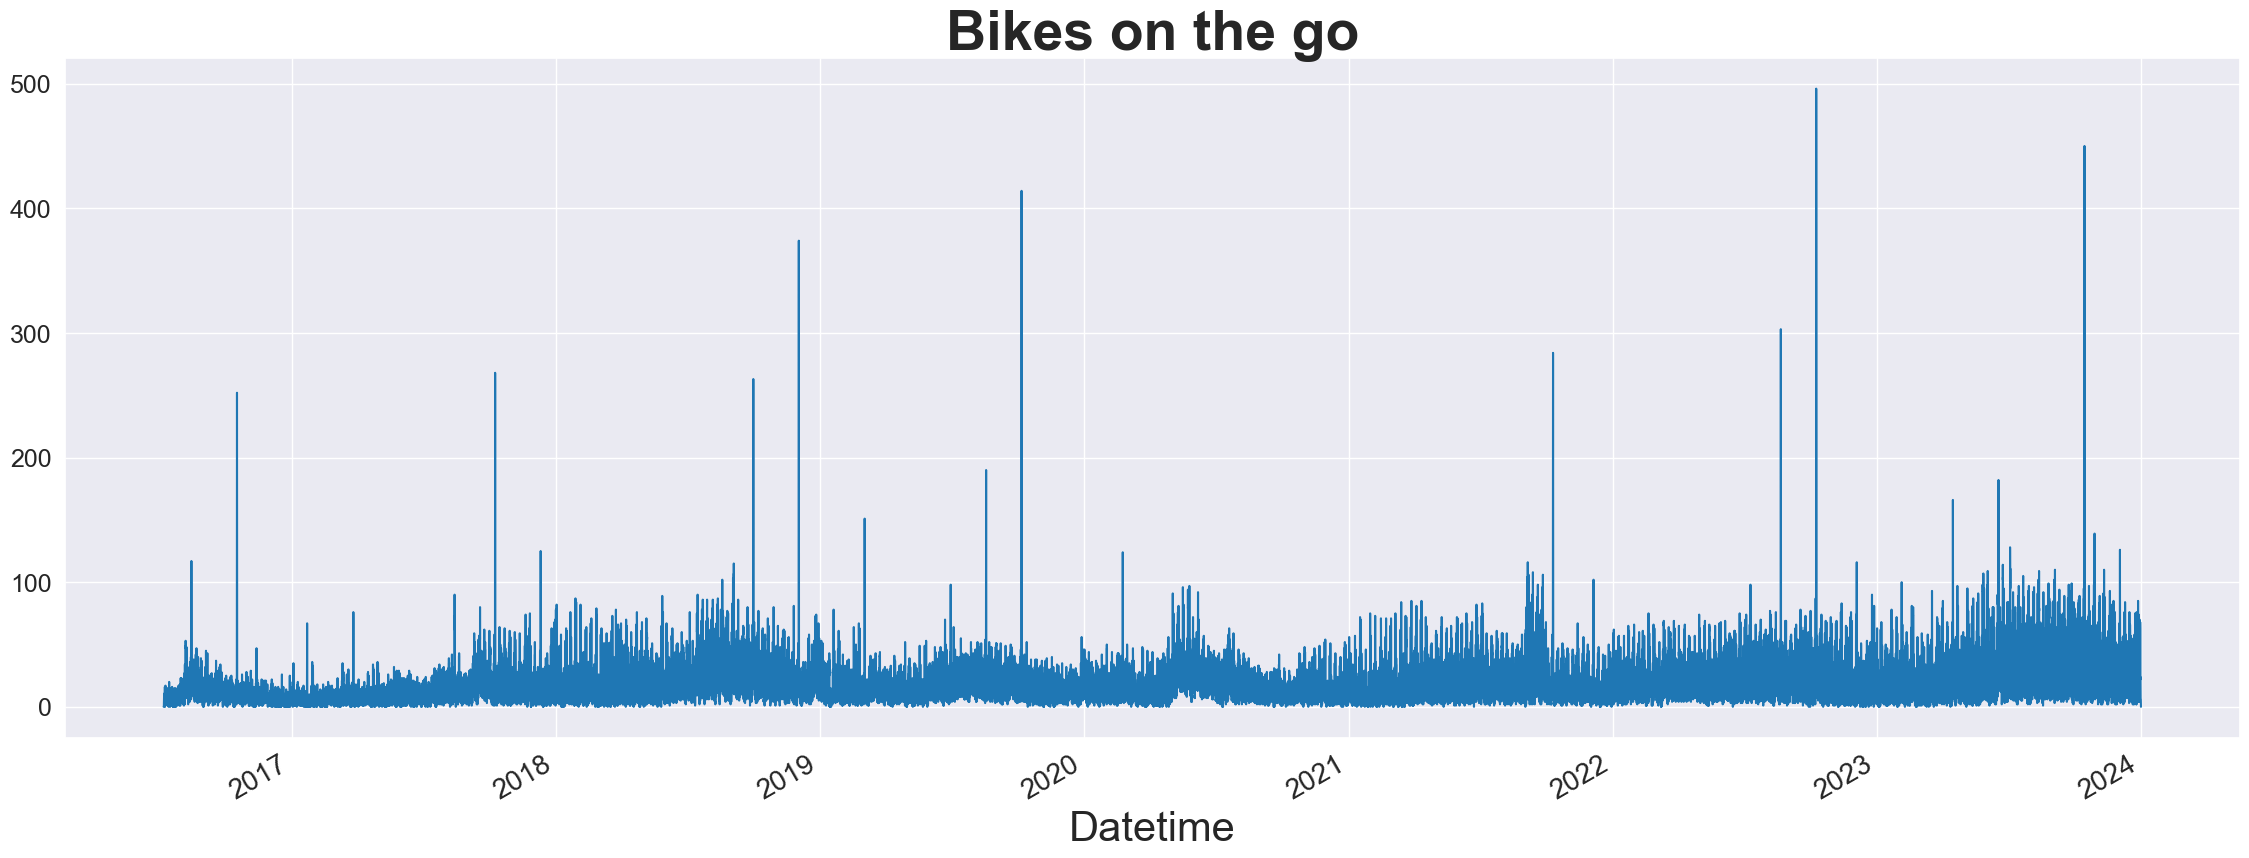

In [17]:
hourly_data.bikes_on_the_go.plot(
        figsize=(25, 10),
        color=color_pal[0])
plt.xlabel('Datetime', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 18)
plt.title('Bikes on the go', fontsize = 40, fontweight = 'bold')
plt.show()

# Visualising possible trends
As we are trying to predict the bikes on the go for the future, we want to first have an idea on what features are important to do so. It could be the month, hour of day or whether it is a weekend or not. 

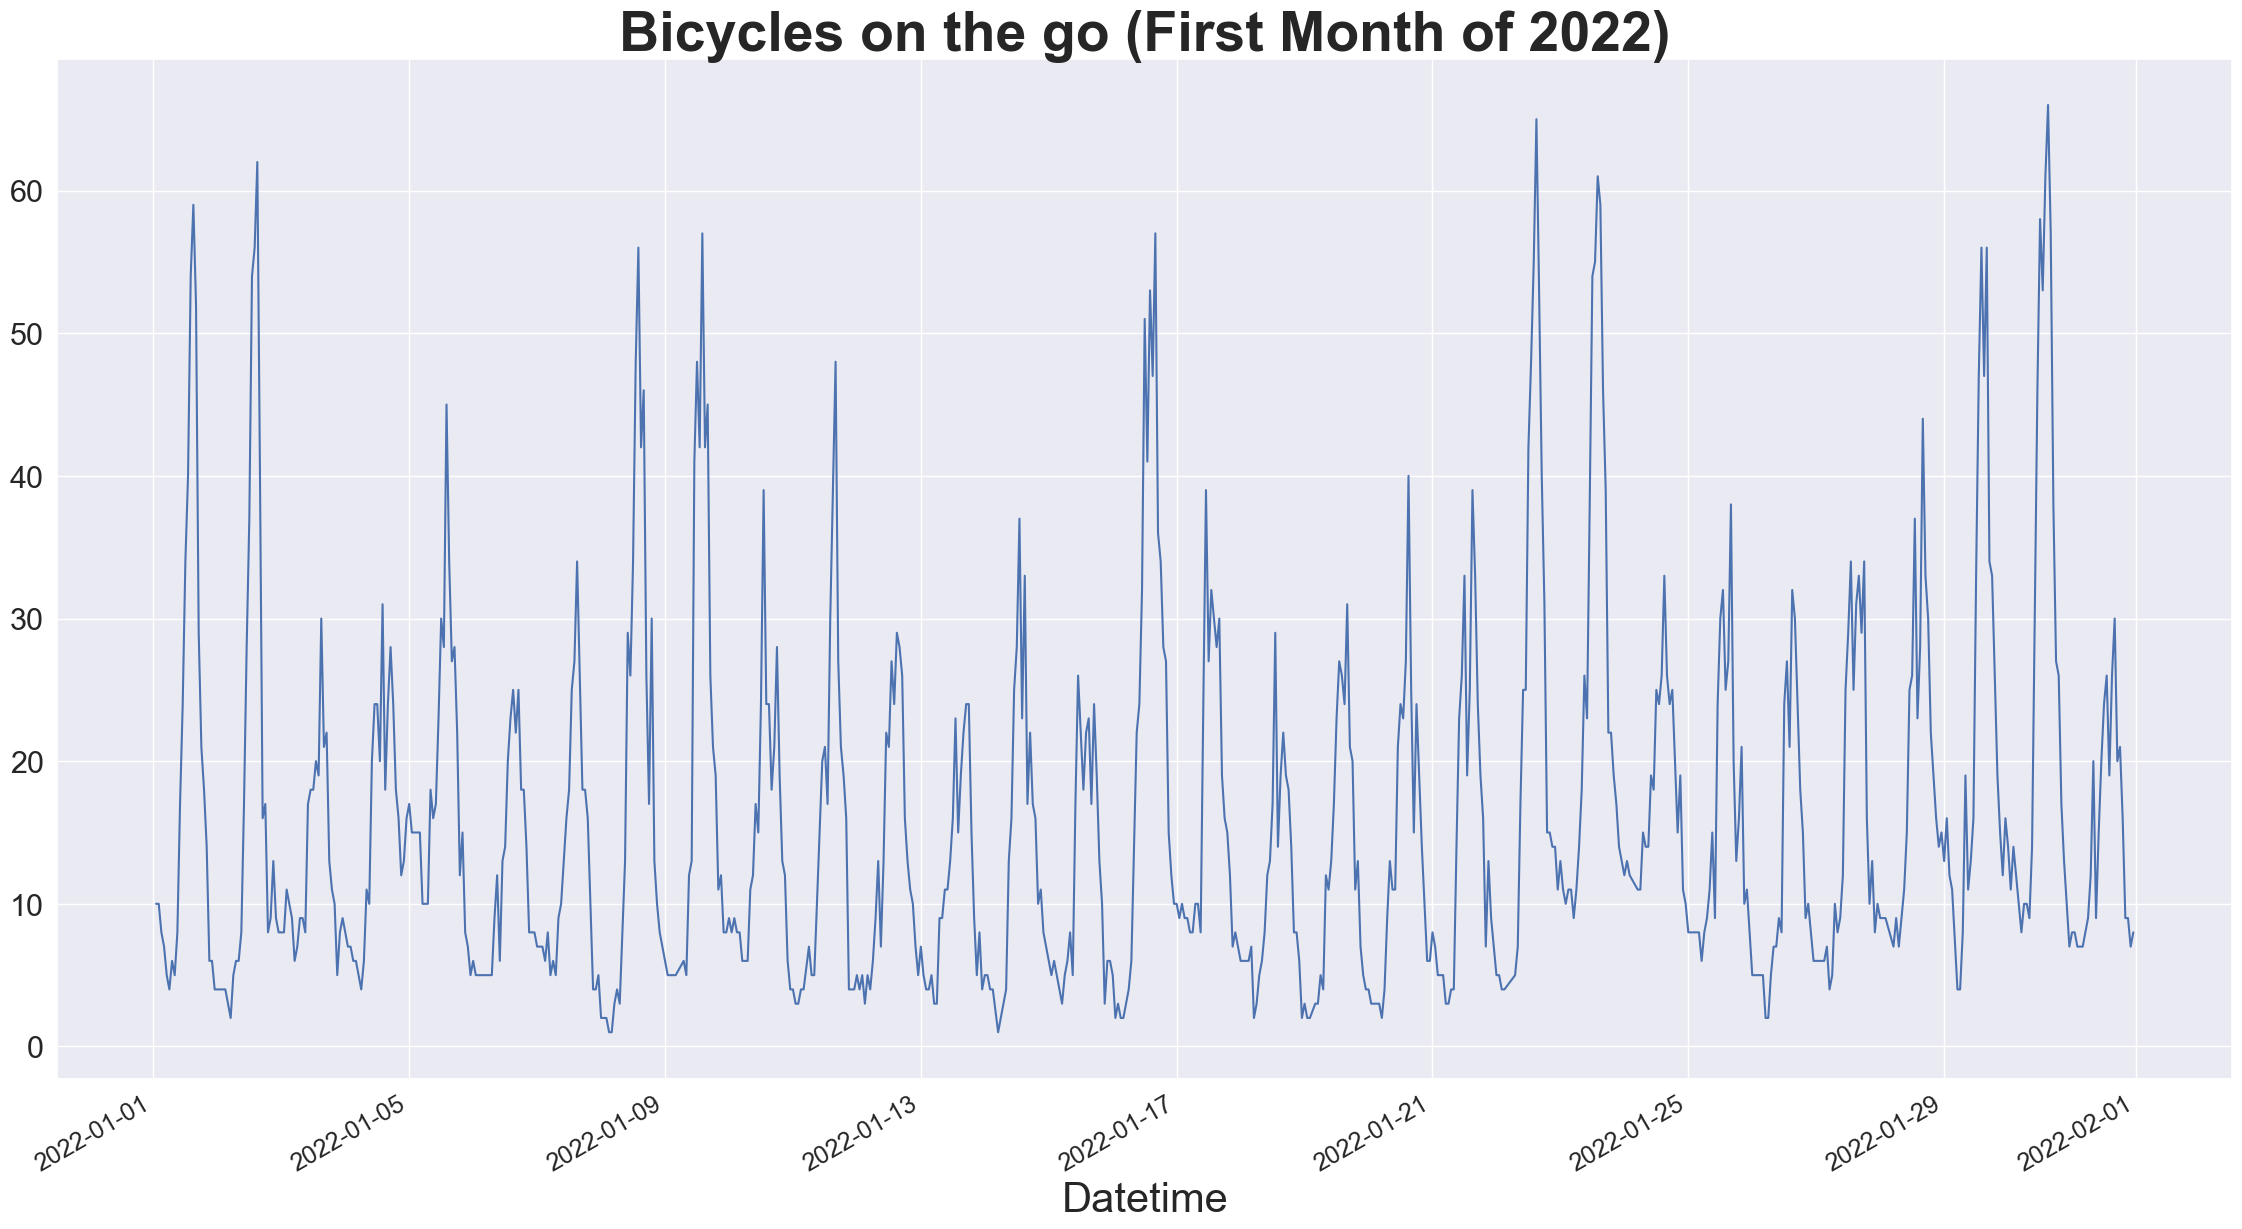

In [18]:
# Visualising one month of data
hourly_data.bikes_on_the_go.loc[(hourly_data.index > '01-01-2022') & (hourly_data.index < '02-01-2022')].plot(figsize=(25, 15))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 22)
plt.xlabel('Datetime', fontsize = 30)
plt.title('Bicycles on the go (First Month of 2022)', fontsize = 40, fontweight = 'bold')
plt.show()

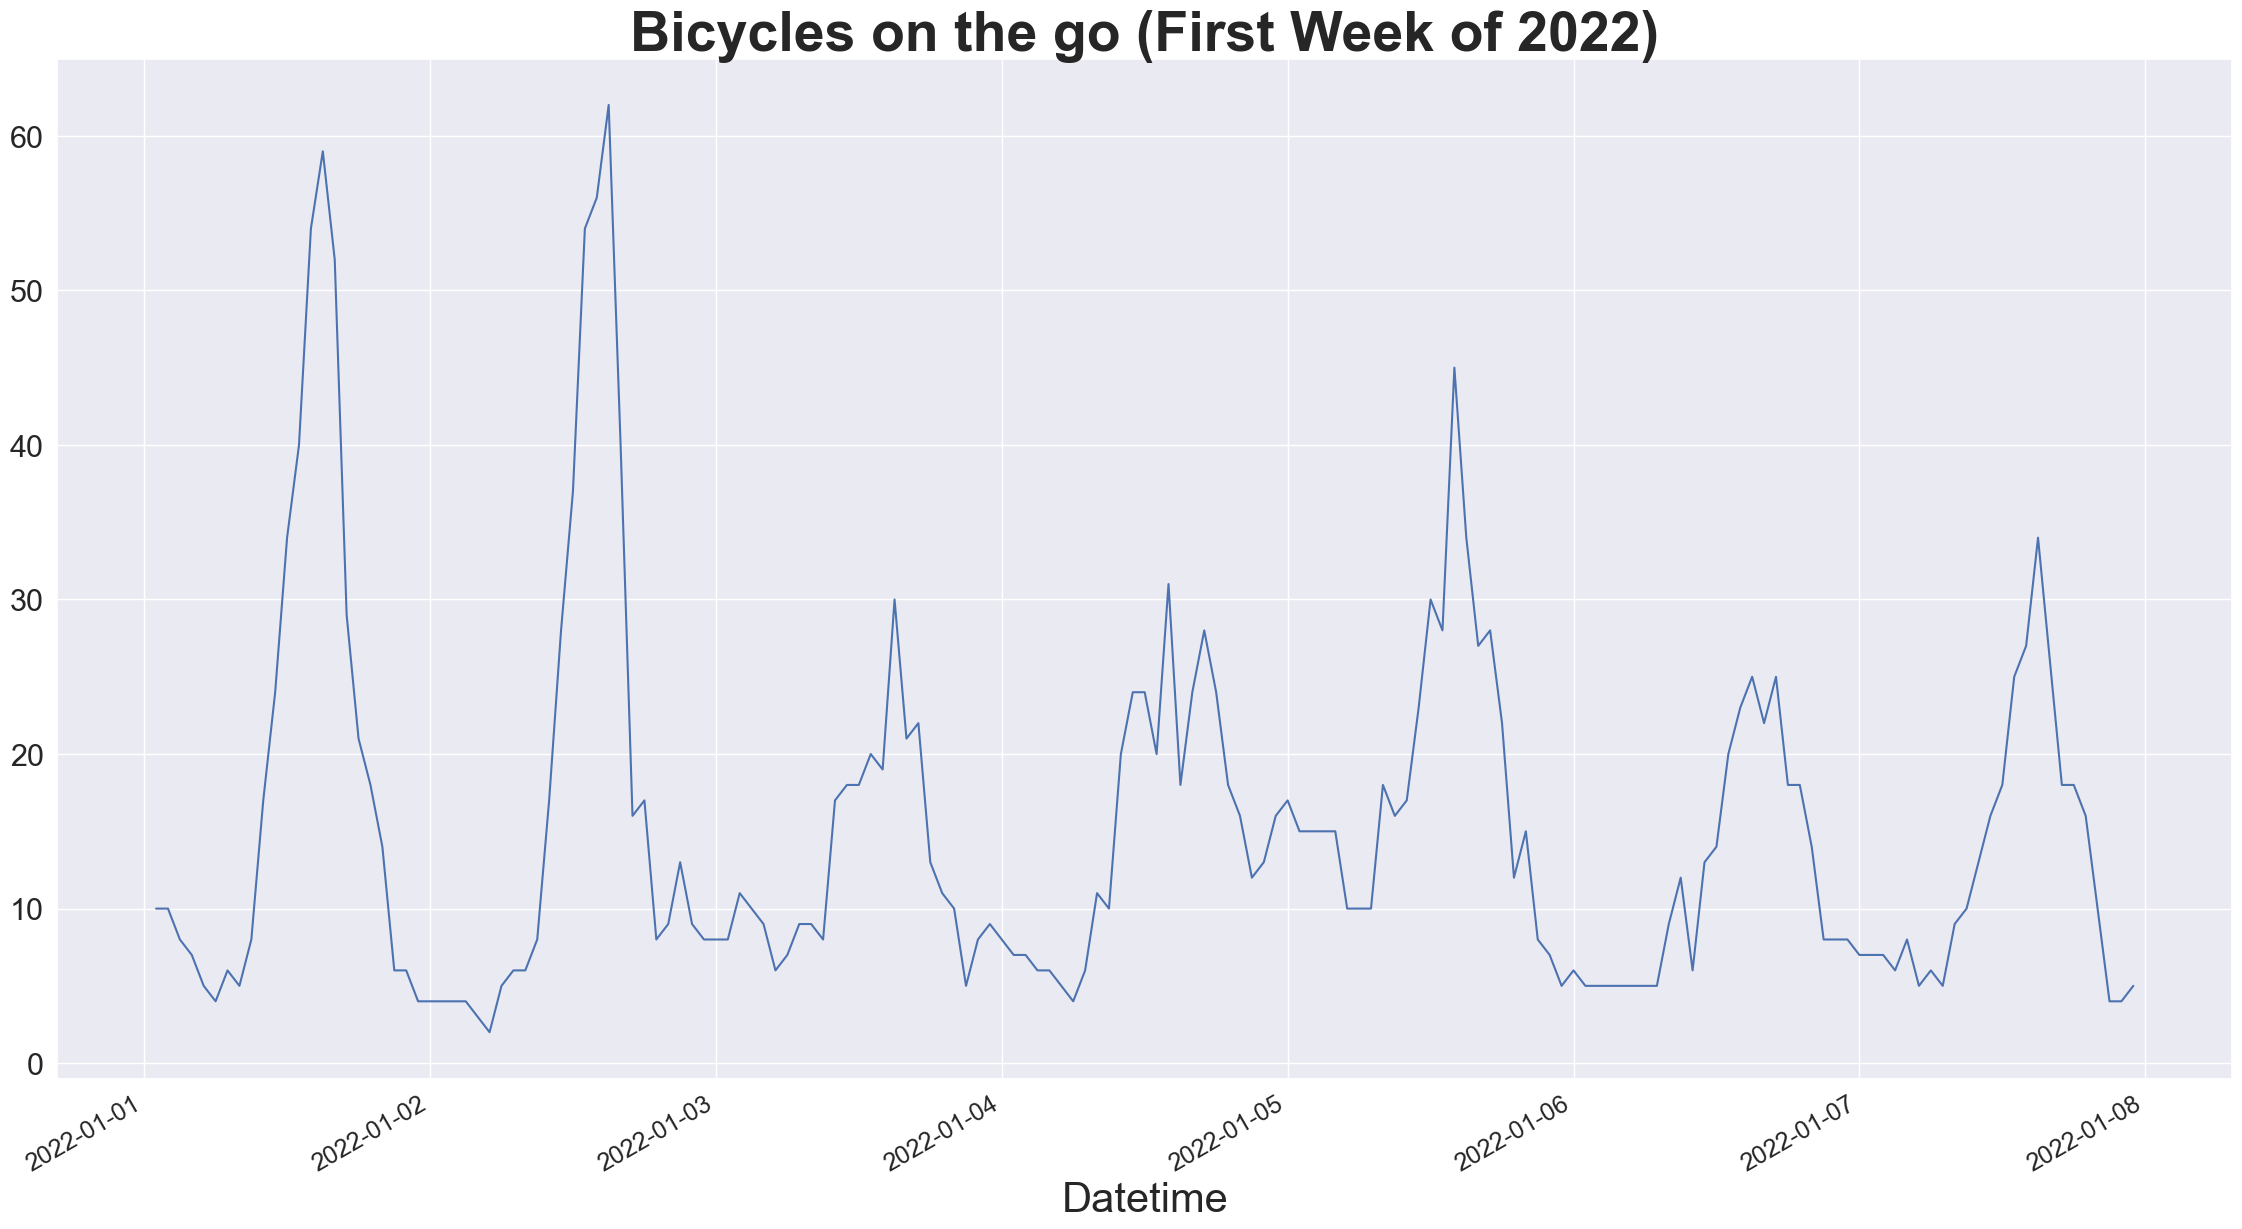

In [19]:
# Visualising one week of data
hourly_data.bikes_on_the_go.loc[(hourly_data.index > '01-01-2022') & (hourly_data.index < '01-08-2022')].plot(figsize=(25, 15))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 22)
plt.xlabel('Datetime', fontsize = 30)
plt.title('Bicycles on the go (First Week of 2022)', fontsize = 40, fontweight = 'bold')
plt.show()

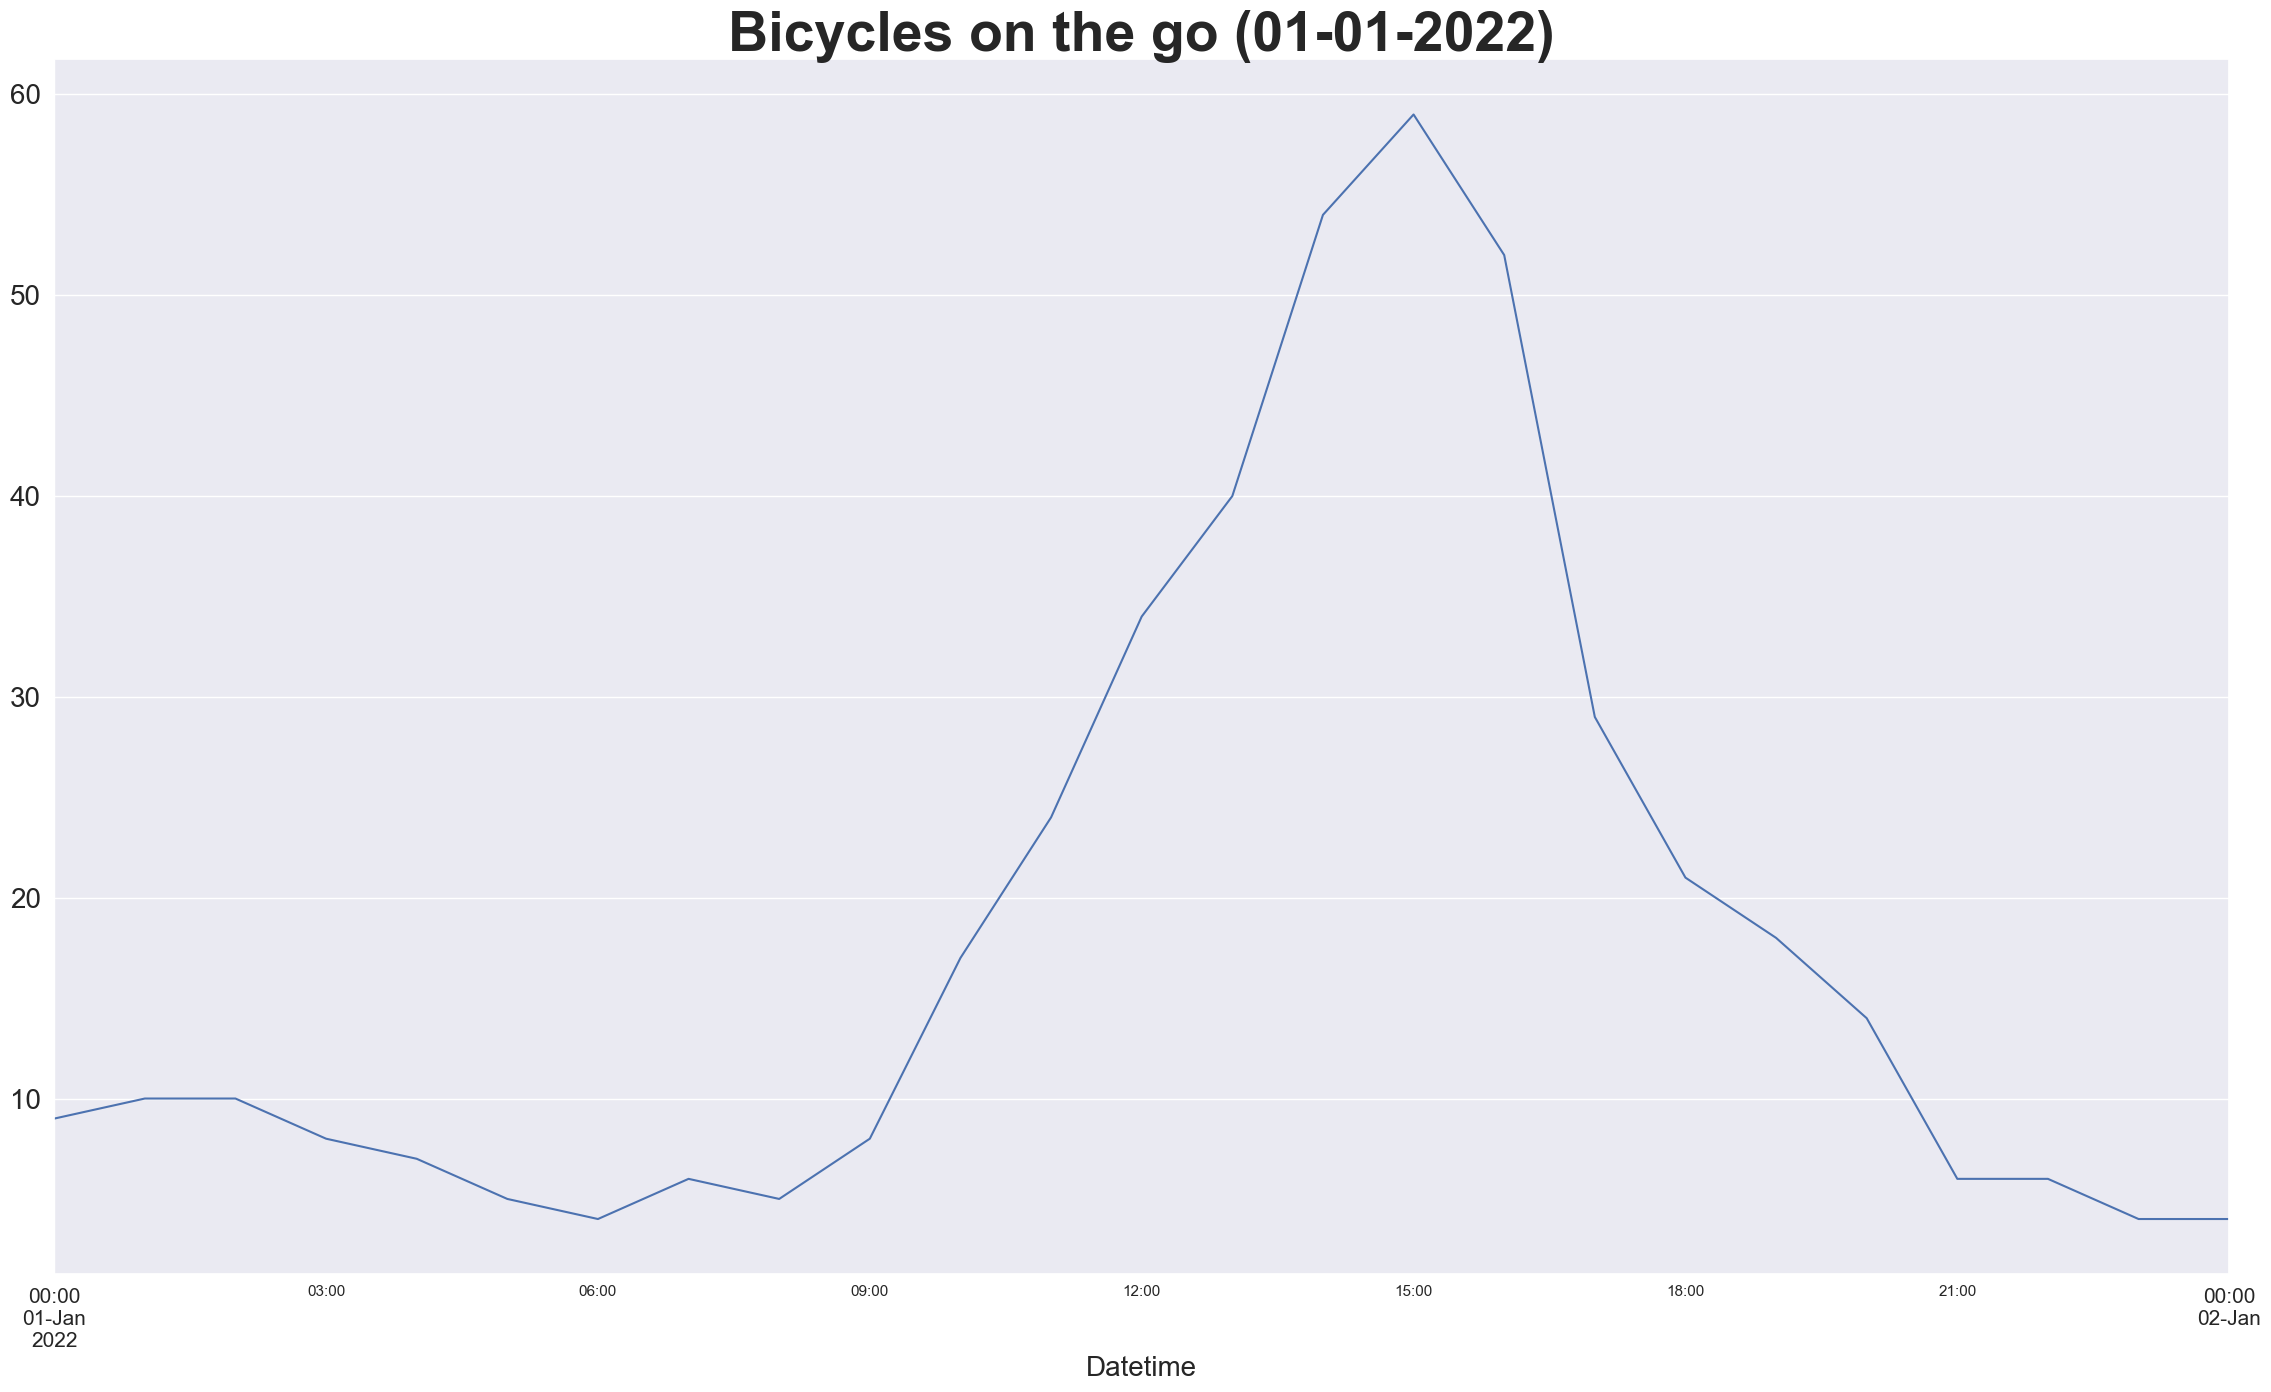

In [20]:
# Visualising one day of data
hourly_data.bikes_on_the_go.loc[(hourly_data.index >= '01-01-2022') & (hourly_data.index <= '01-02-2022')].plot(figsize=(25, 15))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.xlabel('Datetime', fontsize = 20)
plt.title('Bicycles on the go (01-01-2022)', fontsize = 40, fontweight = 'bold')
plt.show()

# Feature Creation
As mentioned previously, we want to understand and categorise our data based on various factors: Day, Hour of day, Weekday/ Weekend, and whether the day is a Public Holiday. These are various factors affecting the demand of bicycles during the year. Understanding the impact of these factors will allow the company to plan ahead for resource allocation, for the supply of bikes to meet (and not overshoot) users' demand.

In [21]:
import calendar
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_names = [calendar.month_name[i] for i in range(1, 13)]

hourly_data['Date'] = hourly_data.index.date
hourly_data['Year'] = hourly_data.index.year
hourly_data['Month'] = hourly_data.index.month.map(lambda x: month_names[x - 1])
hourly_data['Day_of_week'] = hourly_data.index.dayofweek.map(lambda x: day_names[x])
hourly_data['Day_category'] = 'Weekday'  # Default value

# Update Day_category for weekends
hourly_data.loc[hourly_data['Day_of_week'].isin(['Saturday', 'Sunday']), 'Day_category'] = 'Weekend'

# Inserting the new columns at desired positions
hourly_data.insert(0, 'date', hourly_data['Date'])
hourly_data.insert(1, 'year', hourly_data['Year'])
hourly_data.insert(2, 'month', hourly_data['Month'])
hourly_data.insert(3, 'day_of_week', hourly_data['Day_of_week'])
hourly_data.insert(4, 'day_category', hourly_data['Day_category'])

# Dropping the original columns
hourly_data.drop(['Date', 'Year', 'Month', 'Day_of_week', 'Day_category'], axis=1, inplace=True)
hourly_data.head()

,date,year,month,day_of_week,day_category,hour_of_day,bikes_on_the_go
timestamp,,,,,,,
2016-07-07 04:00:00,2016-07-07,2016,July,Thursday,Weekday,4,0
2016-07-07 06:00:00,2016-07-07,2016,July,Thursday,Weekday,6,0
2016-07-07 10:00:00,2016-07-07,2016,July,Thursday,Weekday,10,1
2016-07-07 12:00:00,2016-07-07,2016,July,Thursday,Weekday,12,4
2016-07-07 13:00:00,2016-07-07,2016,July,Thursday,Weekday,13,10


# Public Holidays feature
We can further classify these days if it is a public holiday

In [22]:
df_holidays = pd.read_csv('holidays.csv')

# This date starts from 2012, so lets truncate it so that it starts from 2016, the year our data starts:
df_holidays.date = pd.to_datetime(df_holidays.date)
df_holidays = df_holidays[df_holidays.date.dt.year >= 2016]
df_holidays.set_index('date', inplace = True)

df_holidays.head()

,holiday
date,
2016-01-01,New Year's Day
2016-02-15,Family Day
2016-03-25,Good Friday
2016-05-23,Victoria Day
2016-07-01,Canada Day


In [23]:
# Let's append these values into a list
holidays = []
for date in df_holidays.index:
    holidays.append(date.date())

In [24]:
# And append it to our dataframe
hourly_data['PublicHoliday'] = 'non-Public Holiday' #initialised

for index, date in hourly_data.date.items():
    if date in holidays:
        hourly_data.at[index, 'PublicHoliday'] = "Public Holiday"
        
hourly_data.insert(5, 'public_holiday', hourly_data.PublicHoliday)
hourly_data.drop(["PublicHoliday"], axis=1, inplace=True)
hourly_data.head()

,date,year,month,day_of_week,day_category,public_holiday,hour_of_day,bikes_on_the_go
timestamp,,,,,,,,
2016-07-07 04:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,4,0
2016-07-07 06:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,6,0
2016-07-07 10:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,10,1
2016-07-07 12:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,12,4
2016-07-07 13:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,13,10


# Covid Lockdown feature
We understand that covid might have reduced the demand of bike rentals significantly, especially when there is a lockdown. 

In [25]:
start_date = datetime.strptime('03-01-2020', '%m-%d-%Y').date()
end_date = datetime.strptime('06-15-2021', '%m-%d-%Y').date()

hourly_data['Covid_Lockdown'] = False

for index in hourly_data.index:
    if (start_date < index.date() < end_date):
        hourly_data.at[index, 'Covid_Lockdown'] = True

hourly_data.insert(6, 'covid_lockdown', hourly_data.Covid_Lockdown)
hourly_data.drop(['Covid_Lockdown'], axis=1, inplace=True)
hourly_data.head()

,date,year,month,day_of_week,day_category,public_holiday,covid_lockdown,hour_of_day,bikes_on_the_go
timestamp,,,,,,,,,
2016-07-07 04:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,False,4,0
2016-07-07 06:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,False,6,0
2016-07-07 10:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,False,10,1
2016-07-07 12:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,False,12,4
2016-07-07 13:00:00,2016-07-07,2016,July,Thursday,Weekday,non-Public Holiday,False,13,10


# Visualise Feature/ Taget Relationship
Now that we have the features as part of the time series data, we can visualise the relationship between the features and the number of bikes on the go

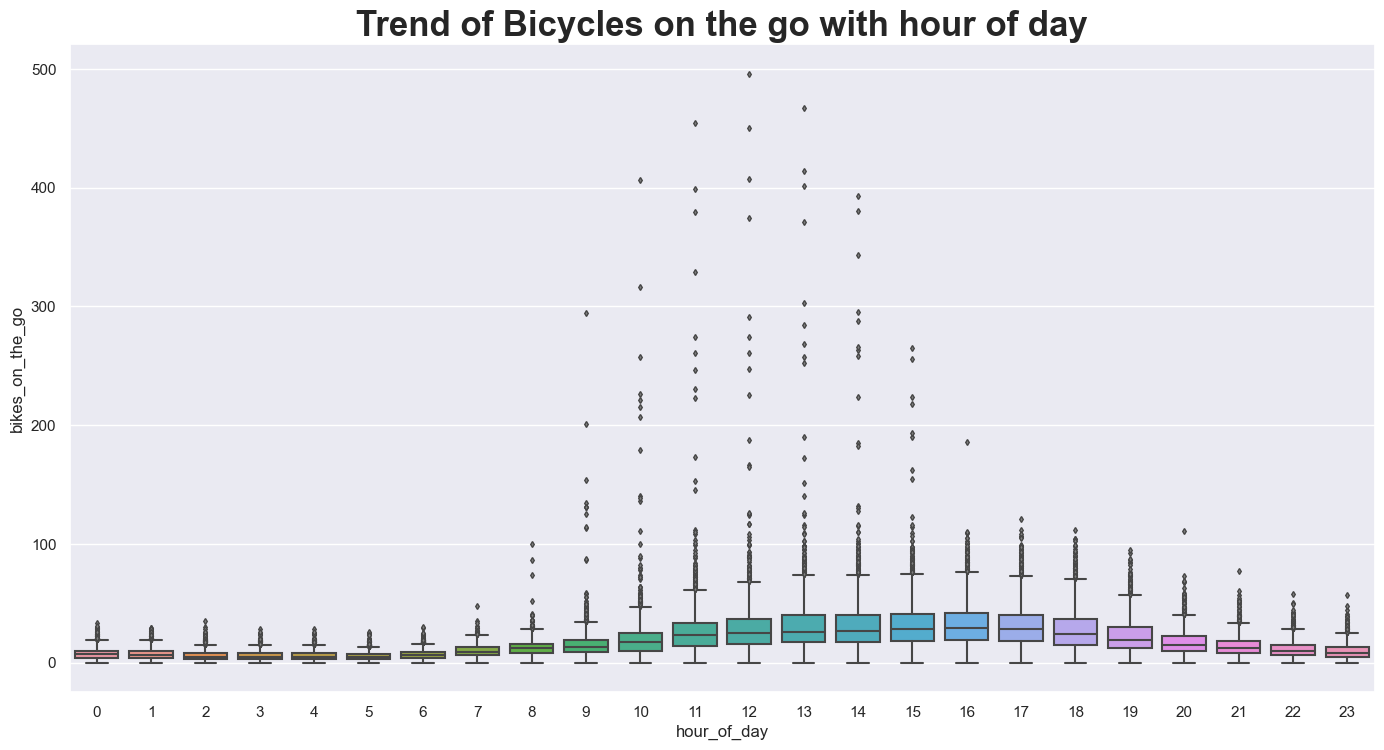

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
flierprops = dict(markersize = 3, markerfacecolor='grey')
sb.boxplot(data = hourly_data, x = 'hour_of_day', y = 'bikes_on_the_go', flierprops = flierprops)
plt.title('Trend of Bicycles on the go with hour of day', fontsize = 25, fontweight = 'bold')
plt.show()

The hour of the day seems to be an important feature, with its distribution being greater at certain times of the day, and has a greater number of outliers (also with high values). Lets see bikes on the go is affected during these hours on different days.

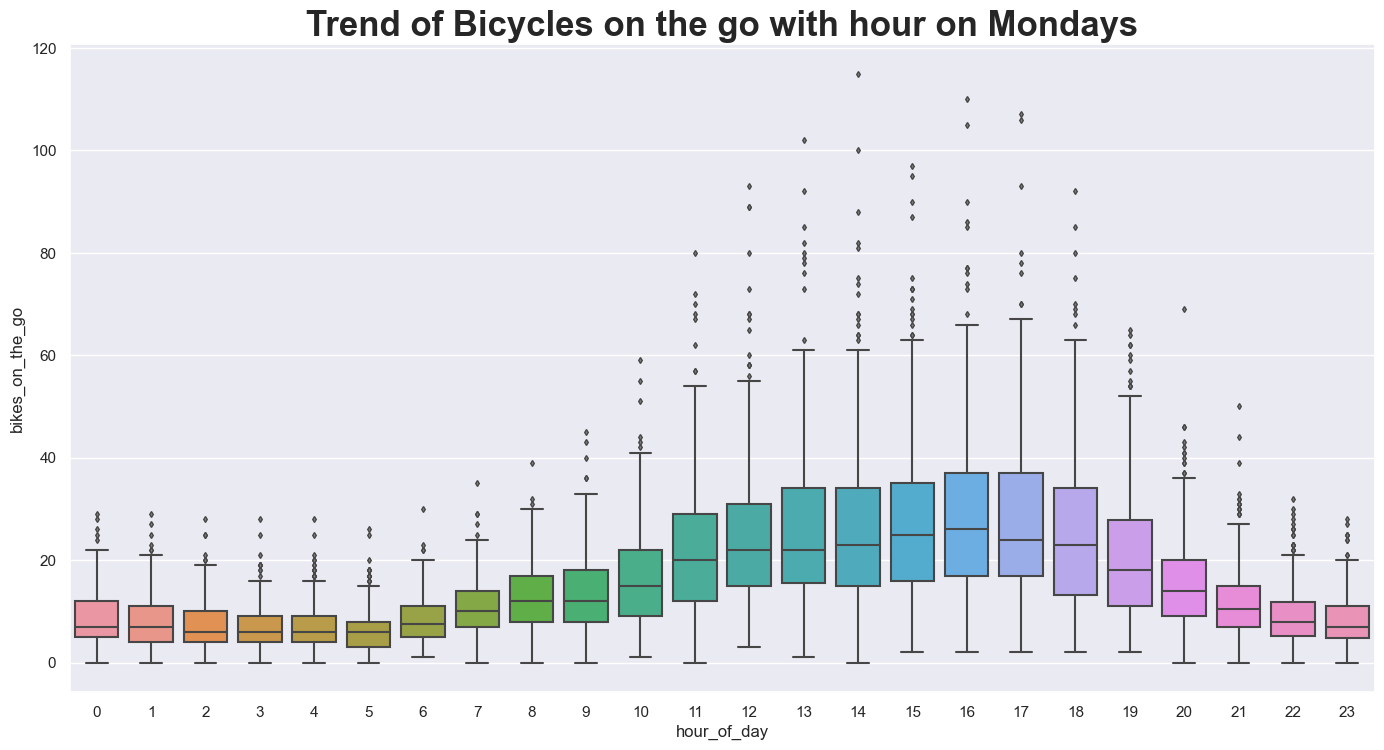

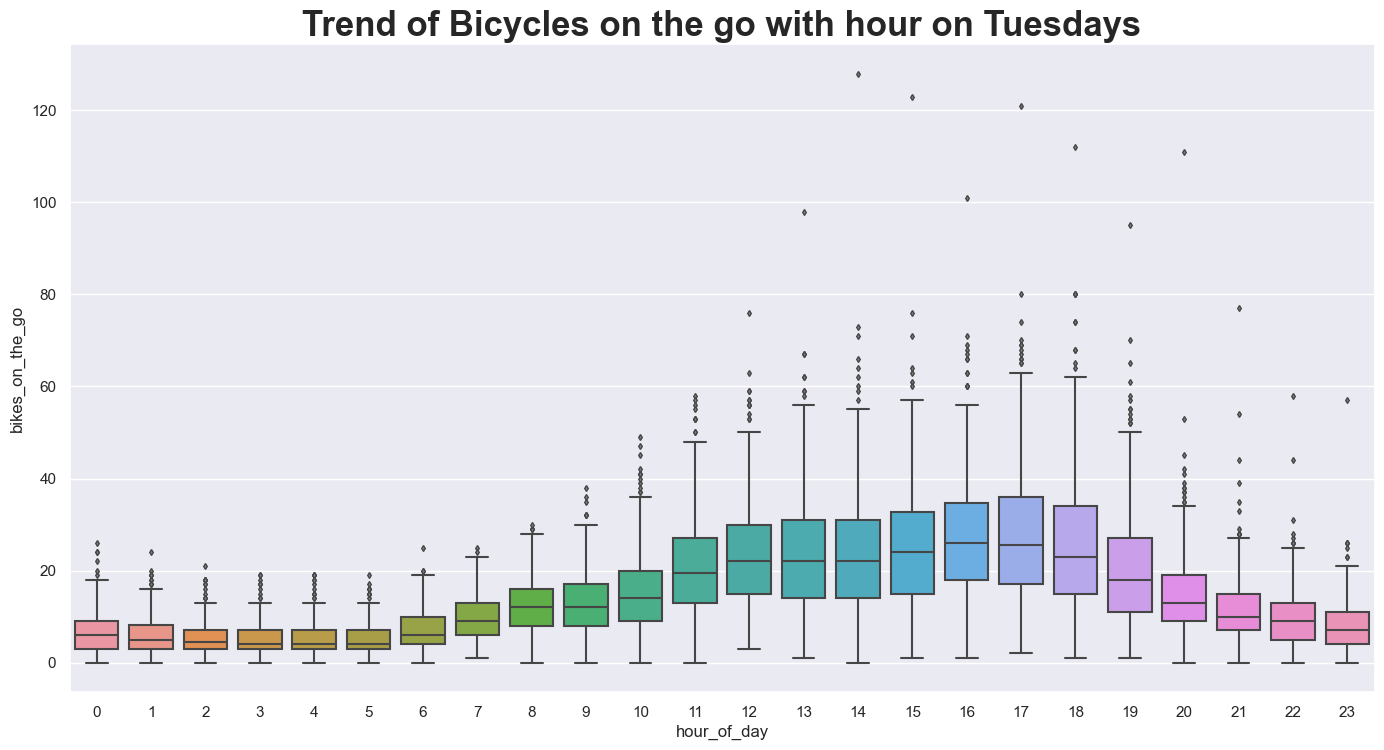

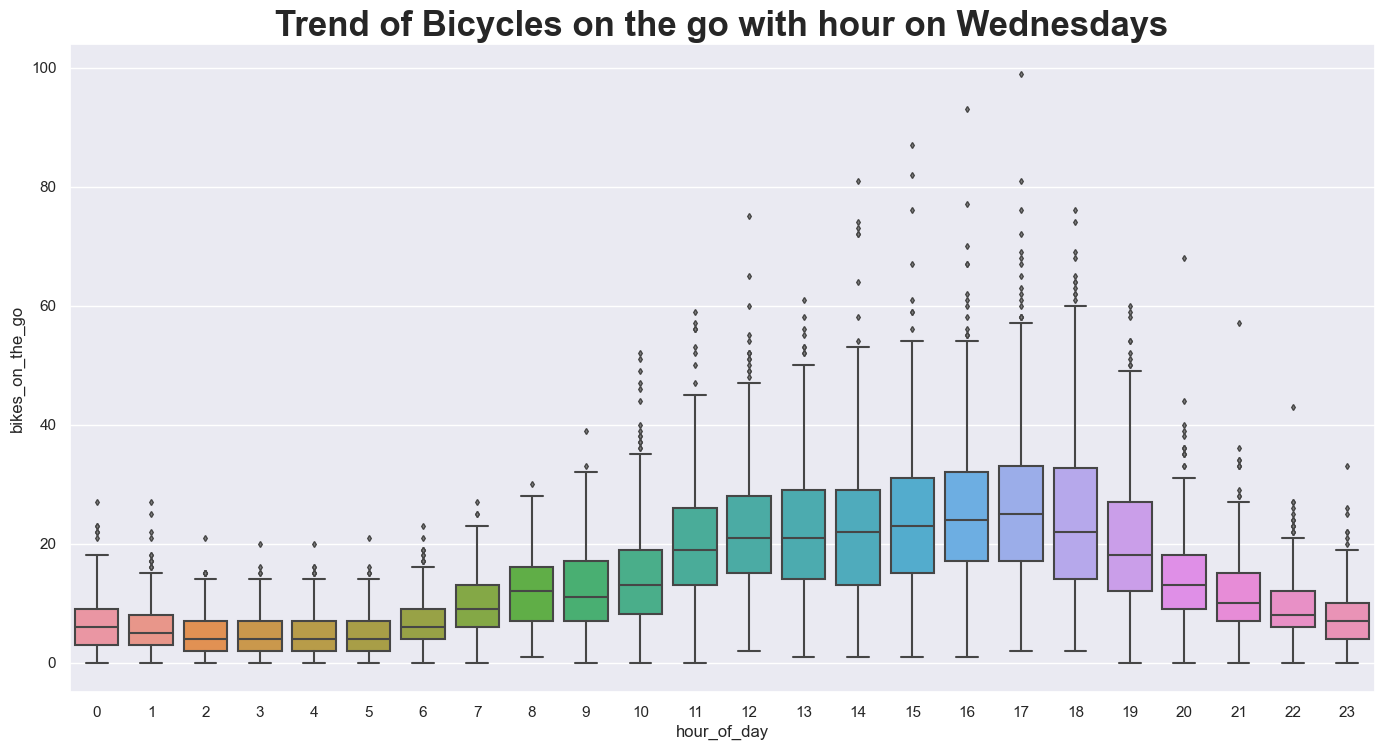

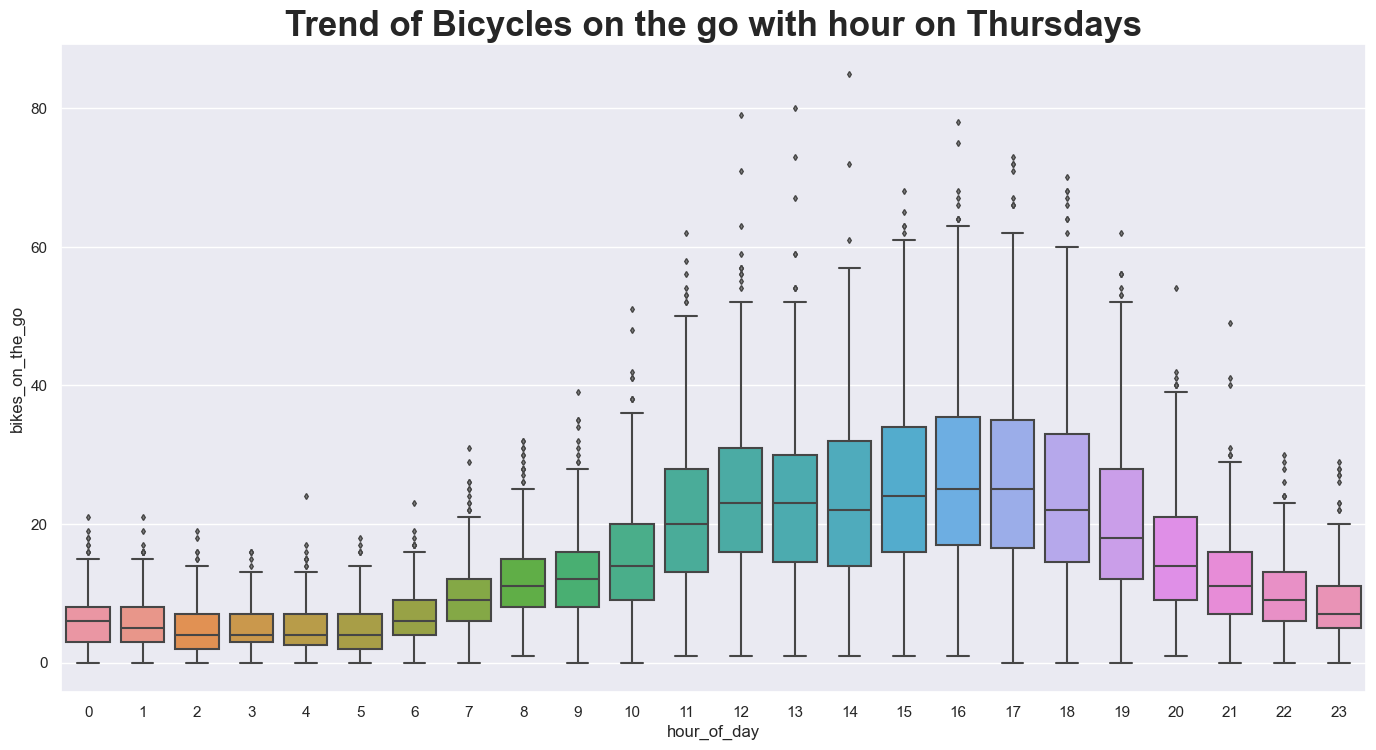

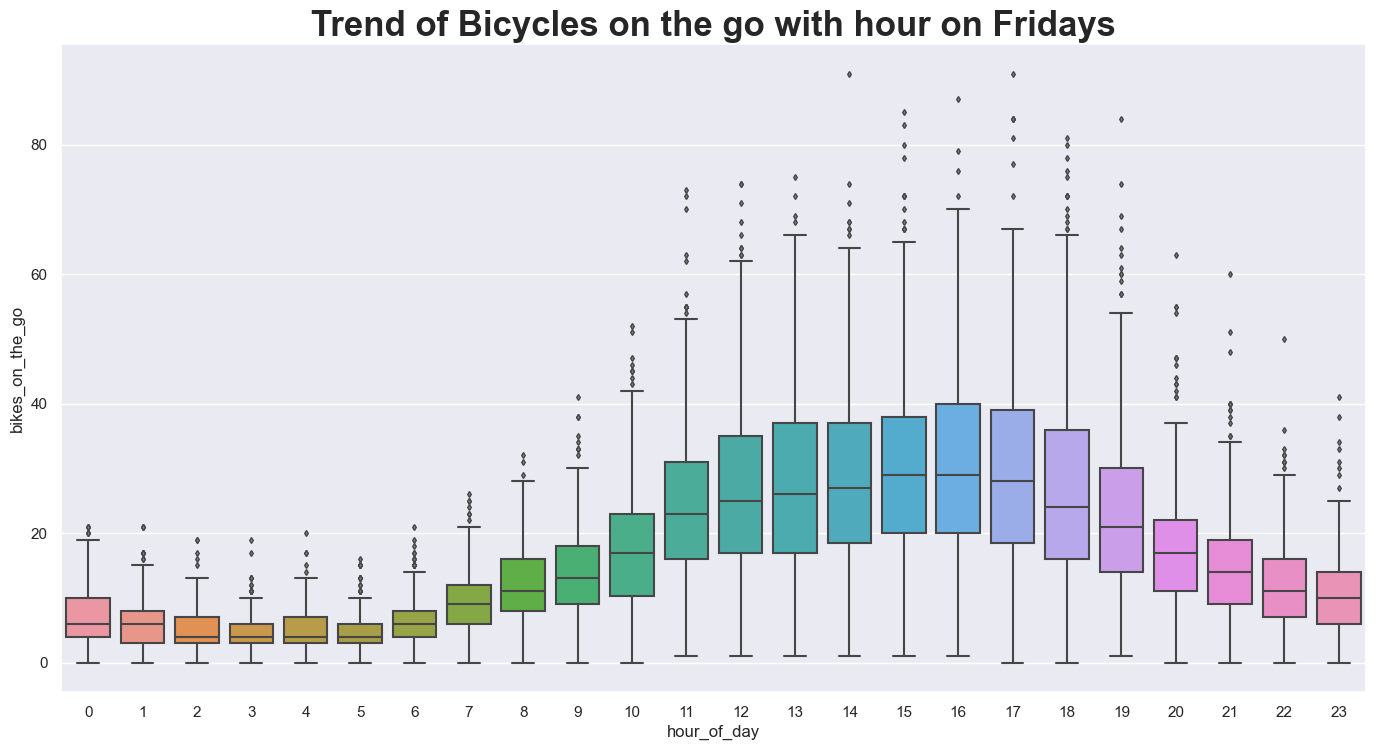

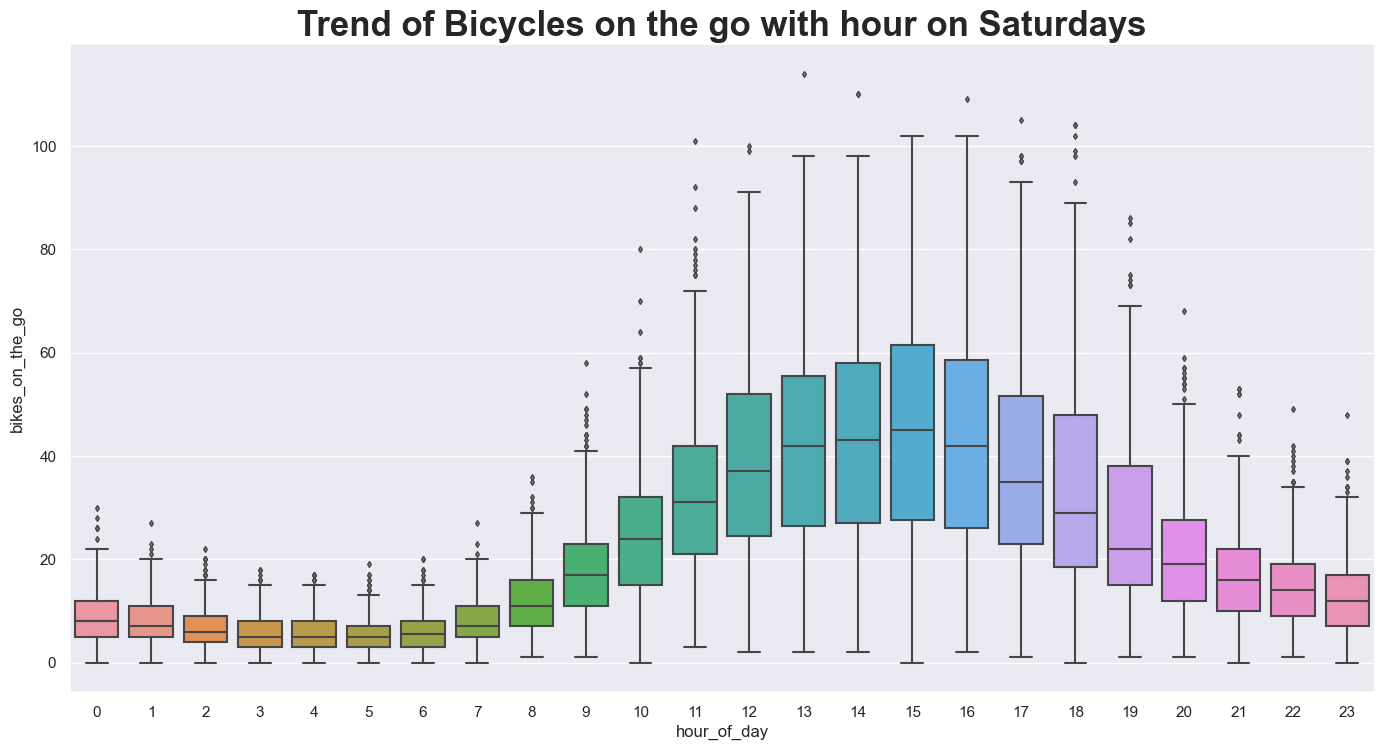

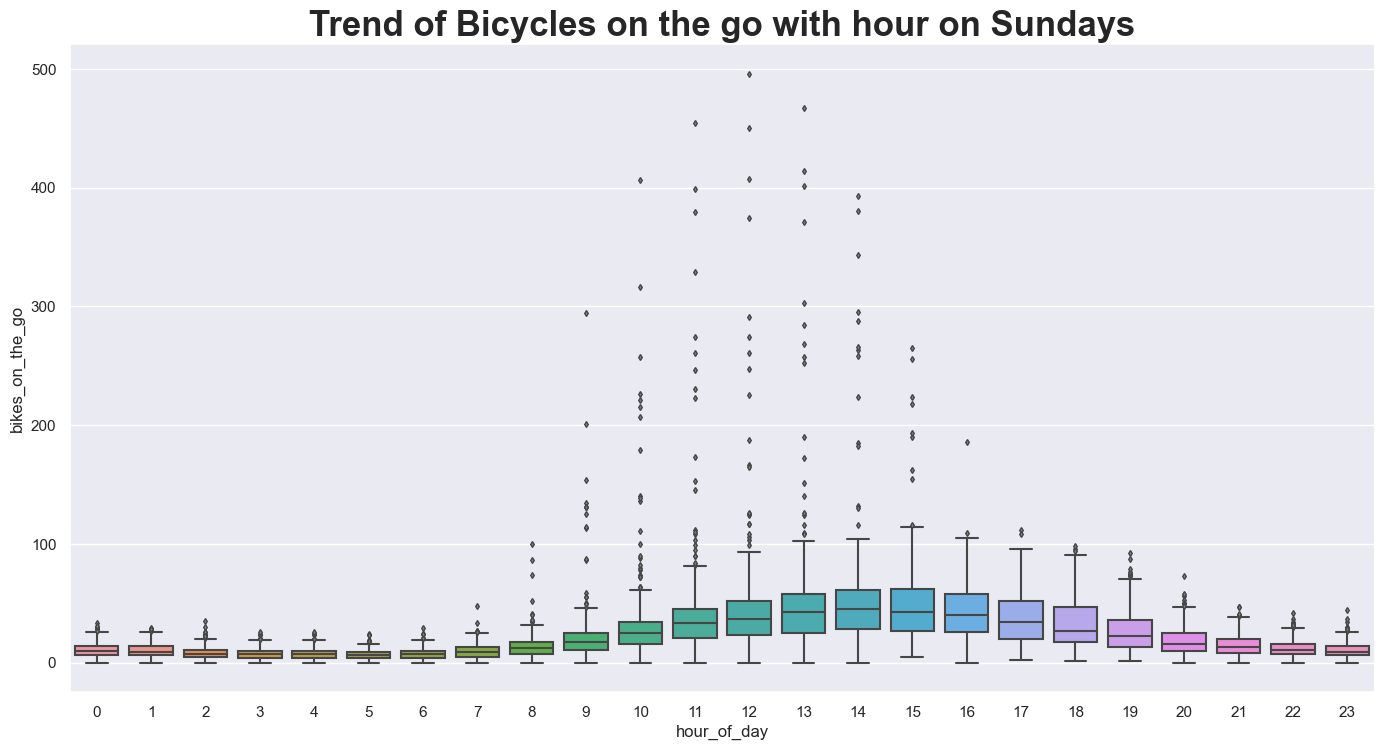

In [27]:
for day in day_names:

    day_data = hourly_data[hourly_data.day_of_week == day]
    fig, ax = plt.subplots(figsize=(15, 8))
    flierprops = dict(markersize = 3, markerfacecolor='grey')
    sb.boxplot(data = day_data, x = 'hour_of_day', y = 'bikes_on_the_go', flierprops = flierprops)
    plt.title('Trend of Bicycles on the go with hour on ' + day + 's', fontsize = 25, fontweight = 'bold')
    plt.show()

Of course, the months and public holidays could also be crucial in affecting the number of bikes on the go as well. 

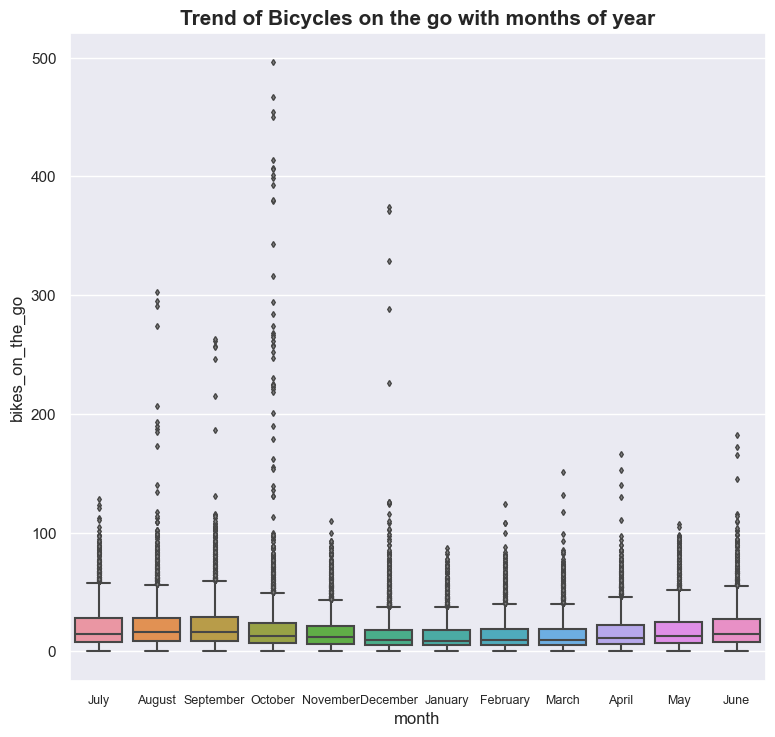

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
flierprops = dict(markersize = 3, markerfacecolor='grey')
sb.boxplot(data = hourly_data, x = 'month', y = 'bikes_on_the_go', flierprops = flierprops)
plt.title('Trend of Bicycles on the go with months of year', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 9)
plt.show()

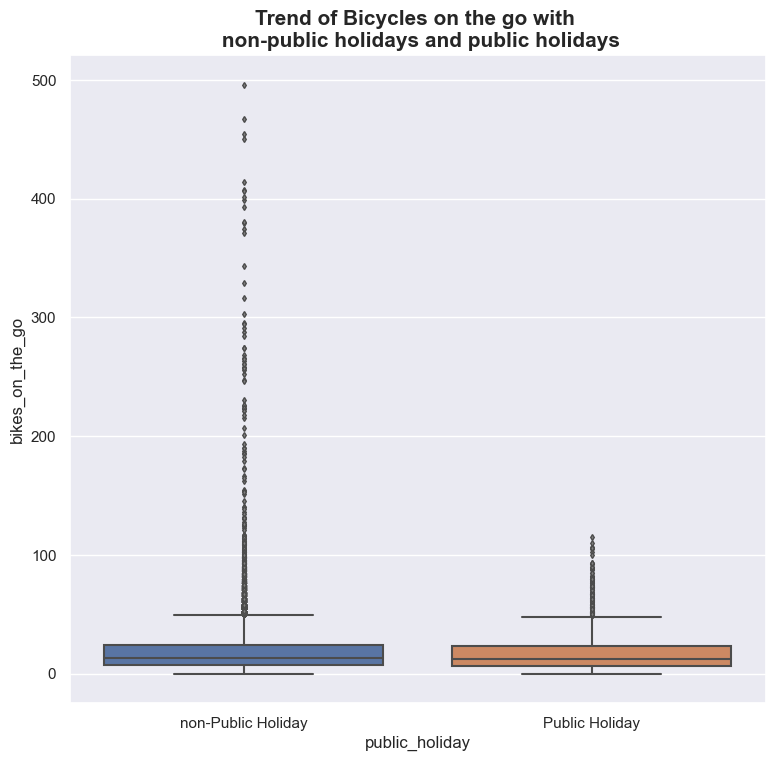

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
flierprops = dict(markersize = 3, markerfacecolor='grey')
sb.boxplot(data = hourly_data, x = 'public_holiday', y = 'bikes_on_the_go', flierprops = flierprops)
plt.title('Trend of Bicycles on the go with \n non-public holidays and public holidays', fontsize = 15, fontweight = 'bold')
plt.show()

It can be seen that the number of bikes on the go is generally lower during the end and start of the year, while the peaks (outliers) occur in August, September and October. However, it is surprising to see that whether it is a public holiday or not does not seem to affect the bikes on the go at all. Also the peaks occur during non-public holidays. There could be possible reasons for this - like people cycle to work or school on work days, rather than during the holidays for leisure. 

# Train/ Test Split
Here, we have decided to split the train to the data before 2023, and the test to include the data from 2023. We do not want to do a random split in order to keep the temporal order of the data to capture dependencies between data points. Also from the company's point of view, the model is meant to predict/ forecast the numbers for future data points.

I have noted that XGBoost which I will be using for the time series prediction of the number of bikes on the go, expects the input data to be of type int, float, bool, or category. Hence, I first need to convert the values of month, day_of_week to an integer. public_holiday to boolean, and a new column is_weekend.

In [30]:
new_hourly_data = hourly_data.copy()
new_hourly_data['month'] = new_hourly_data.index.month
new_hourly_data['day_of_week'] = new_hourly_data.index.dayofweek

new_hourly_data['public_holiday'] = new_hourly_data['public_holiday'].apply(lambda x: True if x == 'Public Holiday' else False)

new_hourly_data['is_Weekend'] = new_hourly_data['day_category'] == 'Weekend'

new_hourly_data.insert(5, 'is_weekend', new_hourly_data['is_Weekend'])

new_hourly_data.drop(['is_Weekend'], axis=1, inplace=True)

# With is_weekend, we do not need day_category:
new_hourly_data.drop(['day_category'], axis=1, inplace=True)


new_hourly_data.head()

,date,year,month,day_of_week,is_weekend,public_holiday,covid_lockdown,hour_of_day,bikes_on_the_go
timestamp,,,,,,,,,
2016-07-07 04:00:00,2016-07-07,2016,7,3,False,False,False,4,0
2016-07-07 06:00:00,2016-07-07,2016,7,3,False,False,False,6,0
2016-07-07 10:00:00,2016-07-07,2016,7,3,False,False,False,10,1
2016-07-07 12:00:00,2016-07-07,2016,7,3,False,False,False,12,4
2016-07-07 13:00:00,2016-07-07,2016,7,3,False,False,False,13,10


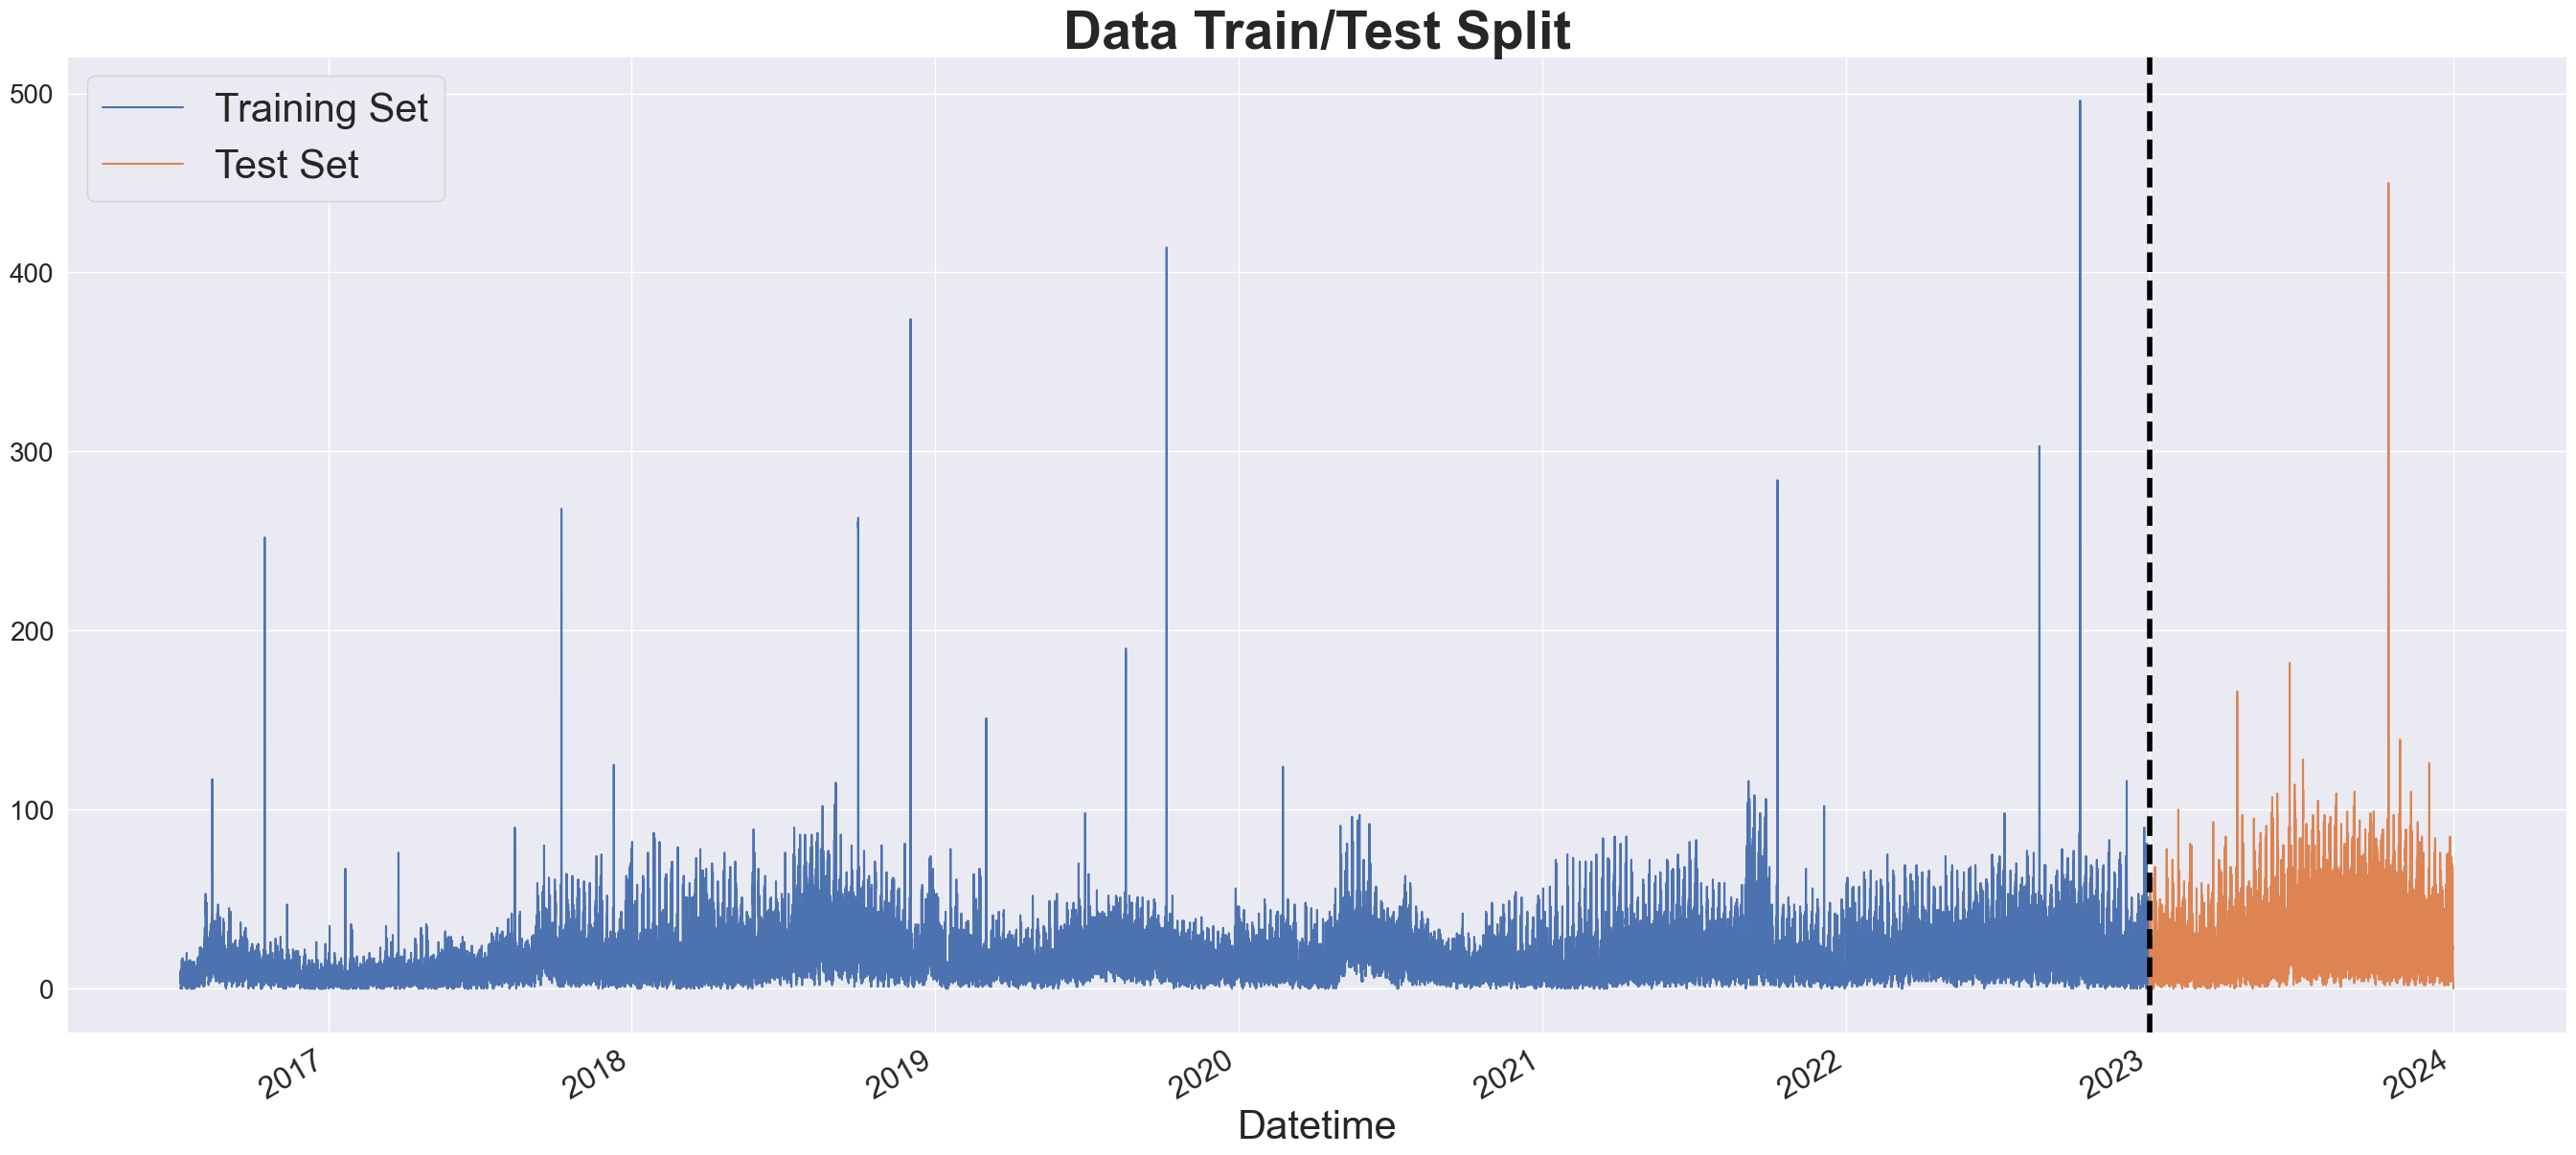

In [31]:
train = new_hourly_data.loc[new_hourly_data.index < '01-01-2023']
test = new_hourly_data.loc[new_hourly_data.index >= '01-01-2023']

fig, ax = plt.subplots(figsize=(30, 15))
train.bikes_on_the_go.plot(ax = ax, label = 'Training Set')
test.bikes_on_the_go.plot(ax = ax, label = 'Test Set')
ax.axvline('01-01-2023', color = 'black', ls='--', linewidth=4)
ax.legend(['Training Set', 'Test Set'])
plt.legend(fontsize=30)
plt.xlabel('Datetime', fontsize = 30)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 20)
plt.title('Data Train/Test Split', fontsize = 40, fontweight = 'bold')
plt.show()

# Creating Our Model for bikes on the go prediction

In [32]:
features = ['year', 'month', 'day_of_week', 'hour_of_day', 'is_weekend', 'public_holiday', 'covid_lockdown']
target = 'bikes_on_the_go'

X_train = train[features]
Y_train = train[target]

X_test = test[features]
Y_test = test[target]

In [33]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth= 7,
                       learning_rate=0.01)
reg.fit(X_train, Y_train,
        eval_set=[(X_train, Y_train), (X_test, Y_test)],
        verbose=100)

[21:51:18] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:22.43113	validation_1-rmse:35.16233
[100]	validation_0-rmse:13.17421	validation_1-rmse:22.38078
[200]	validation_0-rmse:10.92467	validation_1-rmse:18.01017
[300]	validation_0-rmse:10.33127	validation_1-rmse:16.43409
[400]	validation_0-rmse:10.04632	validation_1-rmse:15.81113
[500]	validation_0-rmse:9.89195	validation_1-rmse:15.57263
[600]	validation_0-rmse:9.79919	validation_1-rmse:15.45170
[700]	validation_0-rmse:9.73538	validation_1-rmse:15.37926
[800]	validation_0-rmse:9.65190	validation_1-rmse:15.35967
[880]	validation_0-rmse:9.62739	validation_1-rmse:15.35629


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

# Feature Importance
We found that the most crucial feature for prediction was whether the rental was during the hour of the day.

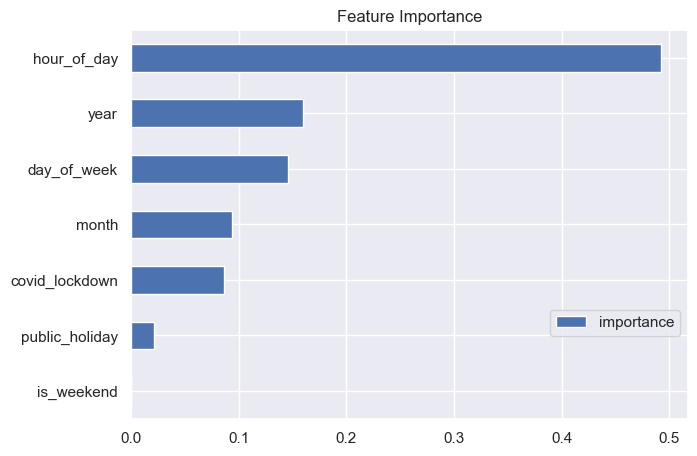

In [34]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.legend(bbox_to_anchor = (1, 0.3))
plt.show()

# Forecast on Test Set

/var/folders/hx/0wt7j0md7ld6cq4m77bhf6w80000gn/T/ipykernel_19323/3834305339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


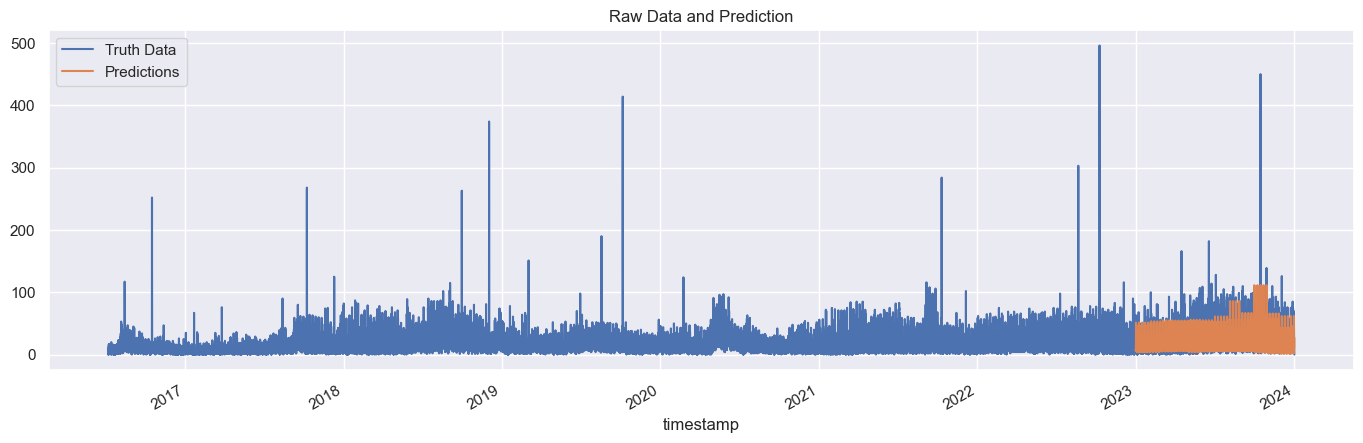

In [35]:
test['prediction'] = reg.predict(X_test)
new_hourly_data = new_hourly_data.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = new_hourly_data[['bikes_on_the_go']].plot(figsize=(15, 5))
new_hourly_data['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

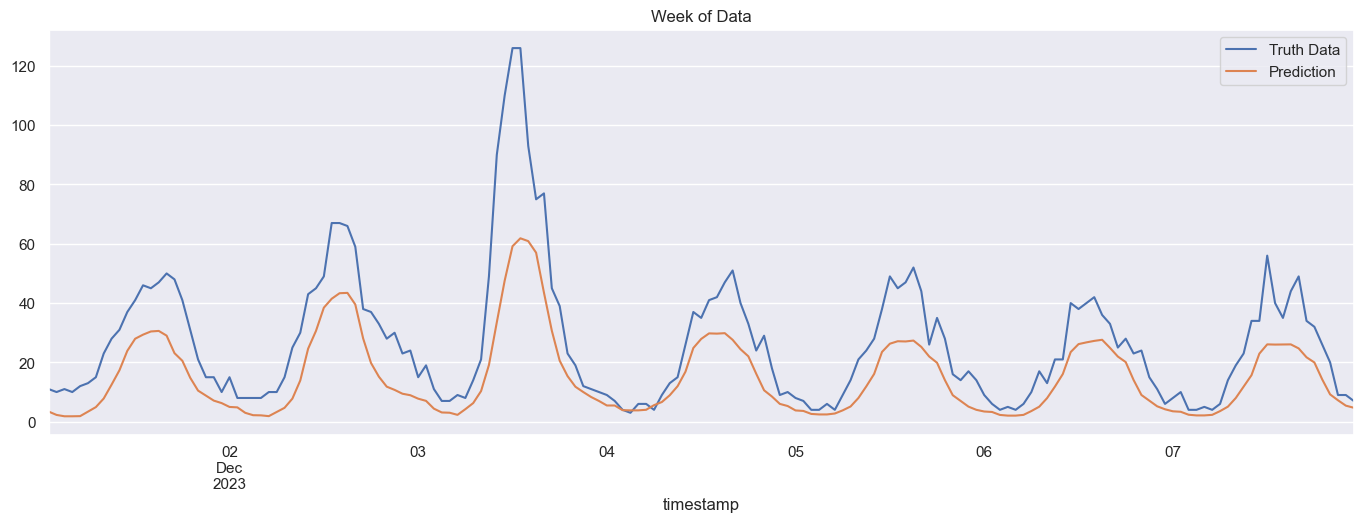

In [36]:
ax = new_hourly_data.loc[(new_hourly_data.index > '12-01-2023') & (new_hourly_data.index < '12-08-2023')]['bikes_on_the_go'] \
    .plot(figsize=(15, 5), title='Week of Data')
new_hourly_data.loc[(new_hourly_data.index > '12-01-2023') & (new_hourly_data.index < '12-08-2023')]['prediction'] \
    .plot()
plt.legend(['Truth Data','Prediction'])
plt.show()

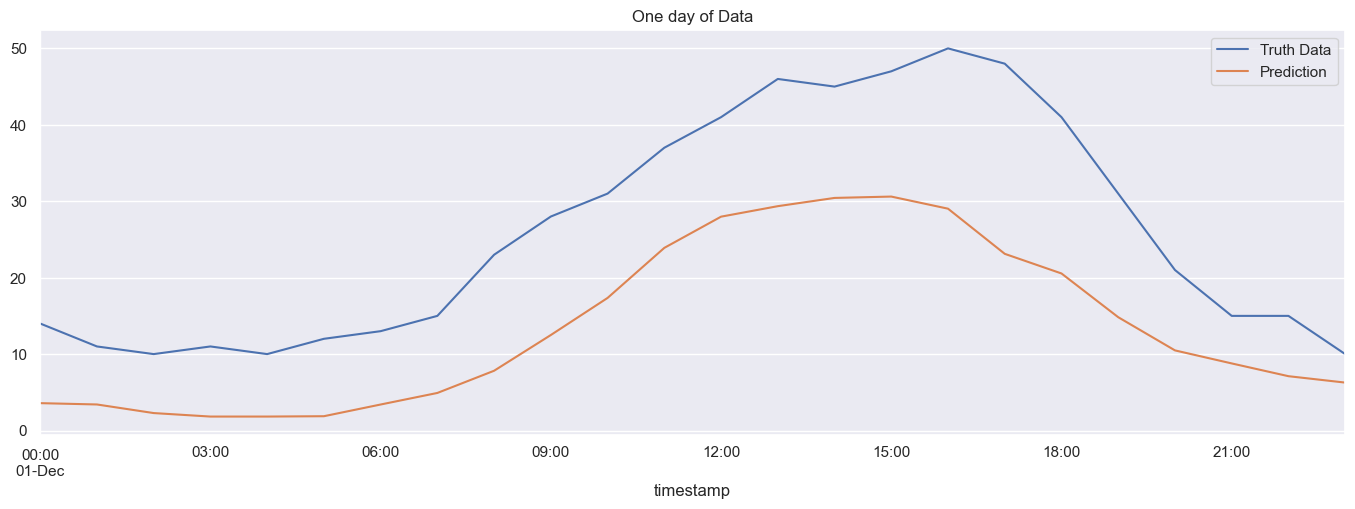

In [37]:
ax = new_hourly_data.loc[new_hourly_data.index.date == datetime.strptime('12-01-2023', '%m-%d-%Y').date()]['bikes_on_the_go'] \
    .plot(figsize=(15, 5), title='One day of Data')
new_hourly_data.loc[new_hourly_data.index.date == datetime.strptime('12-01-2023', '%m-%d-%Y').date()]['prediction'] \
    .plot()
plt.legend(['Truth Data', 'Prediction'])
plt.show()

In [38]:
MSE = mean_squared_error(test['bikes_on_the_go'], test['prediction'])
RMSE = np.sqrt(mean_squared_error(test['bikes_on_the_go'], test['prediction']))
print("Goodness of fit on test set")
print(f'RMSE Score on Test set: {RMSE:0.2f}')
print(f'MSE Score on Test set: {MSE:0.2f}')

Goodness of fit on test set
RMSE Score on Test set: 15.35
MSE Score on Test set: 235.76


In [39]:
# Calculate R^2 score
r2 = r2_score(test['bikes_on_the_go'], test['prediction'])
print("Goodness of fit on train set")
print(f'R^2 Score on Test set: {r2:0.2f}')

Goodness of fit on train set
R^2 Score on Test set: 0.59


# Evaluation of Model

We have played around with the max depth parameter in the XGBRegressor model and the value of 7 has given us the smallest RMSE Score on the test set. However, it can be seen that this model has been unable to predict the peaks in the bikes on the go. These peak actually represent the times where bike demand are the highest and undersupplying can cause major revenue losses for the company. By increase the depth parameter of the XGBRegressor model, we may be able to predict these peaks but that would be considered as overfitting because the model would be capturing noise or patterns specific to the training data that do not generalise well to test data. 

# Outliers in Data
From the previous visualisations, a lot of outliers can be seen in the box plots. As discussed, such outliers reflect the time where revenues are high for the company and under supplying bicycles at these times will result in potentially high revenue losses for the company. We want to examine and identify these 'outliers' or rather data at peak periods.

In [40]:
def FindUpperOutlierBound(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return q3 + 1.5*iqr

def FindLowerOutlierBound(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr

In [41]:
upperbound = FindUpperOutlierBound(hourly_data, 'bikes_on_the_go')
lowerbound = FindLowerOutlierBound(hourly_data, 'bikes_on_the_go')
print("upperbound: " + str(upperbound))
print("lowerbound: " + str(lowerbound))

upperbound: 47.0
lowerbound: -17.0


Because there is so much less activity during days of the week and times of the day, the upper outlier bound is low. It is hence not meaningful to the company to study data where the number of bikes on the go is above 47, as the numbers during the peak hour, for example is much greater than that. However, how would we know when the number of bicycles on the go are at its peak? There must a combination of factors/ features that make it so. 

# Clustering (K-Means)
Clustering allows us to group the data, here it would be by the number of bikes on the go. This will help extract our peak period data.

In [42]:
X = new_hourly_data[['bikes_on_the_go']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/luke/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luke/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luke/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luke/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

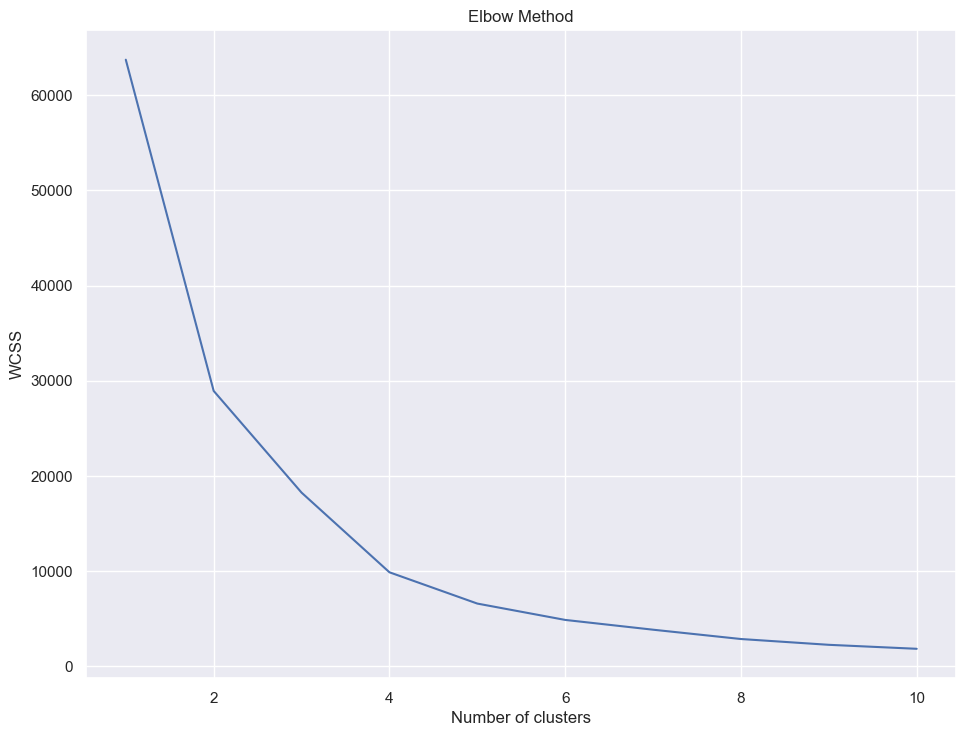

In [43]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [44]:
# Based on your Elbow method result
k = 4  
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/Users/luke/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
new_hourly_data['cluster'] = y_kmeans
# Analyze clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Scale back to original values
cluster_df = pd.DataFrame(cluster_centers, columns=['bikes_on_the_go'])
print(cluster_df)

   bikes_on_the_go
0         8.679003
1        58.735088
2        27.874083
3       282.881356


# Visualising clusters
This can help us identify the cluster where bikes on the go are at their 'peak'.

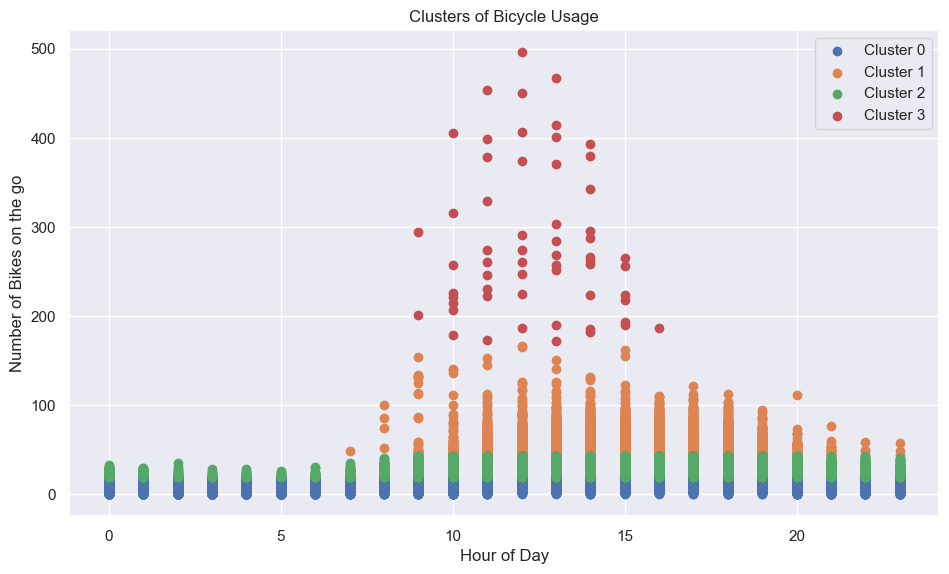

In [46]:
# ploting 'hour_of_day' against 'bikes_on_the_go' colored by cluster
plt.figure(figsize=(10, 6))
for cluster_num in range(4):
    cluster_data = new_hourly_data[new_hourly_data['cluster'] == cluster_num]
    plt.scatter(cluster_data['hour_of_day'], cluster_data['bikes_on_the_go'], label=f'Cluster {cluster_num}')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bikes on the go')
plt.legend()
plt.title('Clusters of Bicycle Usage')
plt.show()

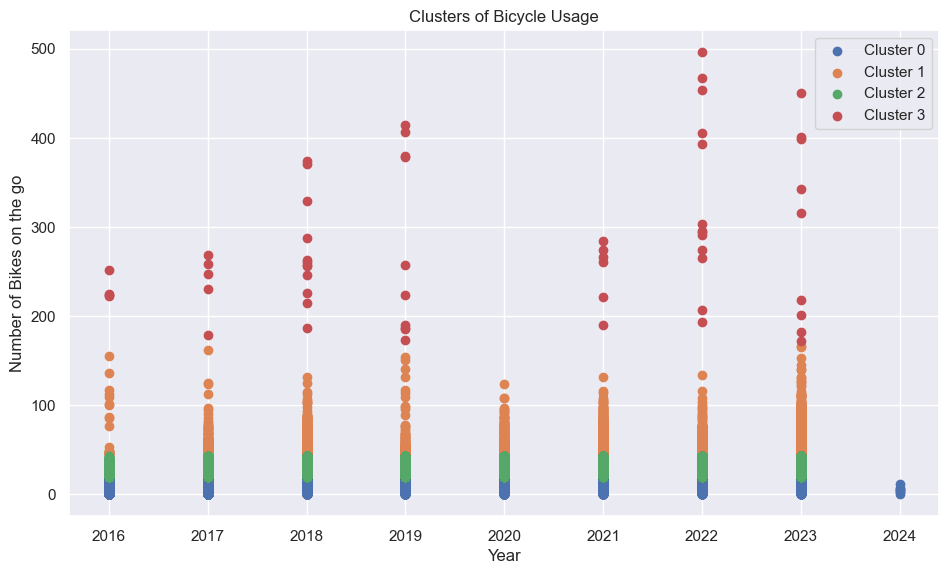

In [47]:
# plotting 'year' against 'bikes_on_the_go' colored by cluster
plt.figure(figsize=(10, 6))
for cluster_num in range(4):
    cluster_data = new_hourly_data[new_hourly_data['cluster'] == cluster_num]
    plt.scatter(cluster_data['year'], cluster_data['bikes_on_the_go'], label=f'Cluster {cluster_num}')
plt.xlabel('Year')
plt.ylabel('Number of Bikes on the go')
plt.legend()
plt.title('Clusters of Bicycle Usage')
plt.show()

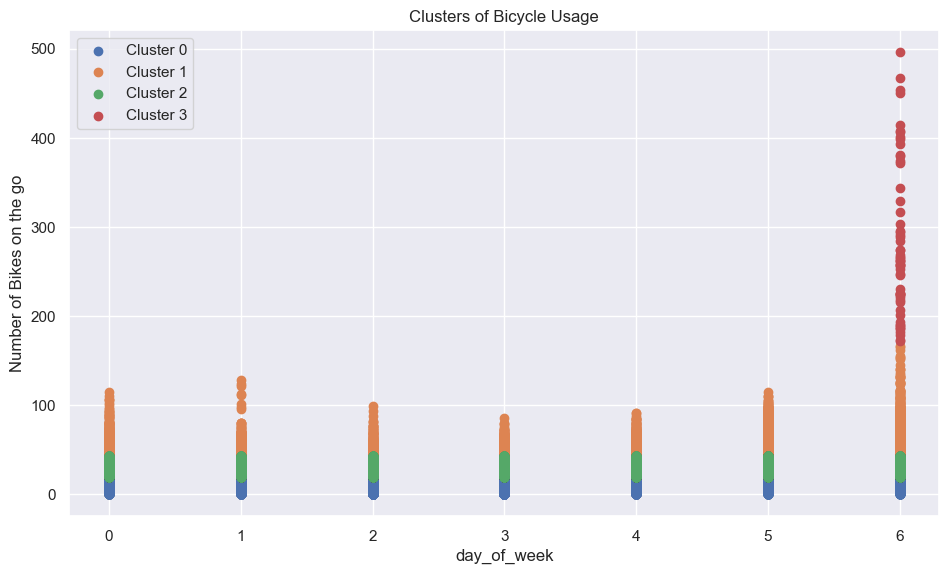

In [48]:
# plotting 'day_of_week' against 'bikes_on_the_go' colored by cluster
plt.figure(figsize=(10, 6))
for cluster_num in range(4):
    cluster_data = new_hourly_data[new_hourly_data['cluster'] == cluster_num]
    plt.scatter(cluster_data['day_of_week'], cluster_data['bikes_on_the_go'], label=f'Cluster {cluster_num}')
plt.xlabel('day_of_week')
plt.ylabel('Number of Bikes on the go')
plt.legend()
plt.title('Clusters of Bicycle Usage')
plt.show()

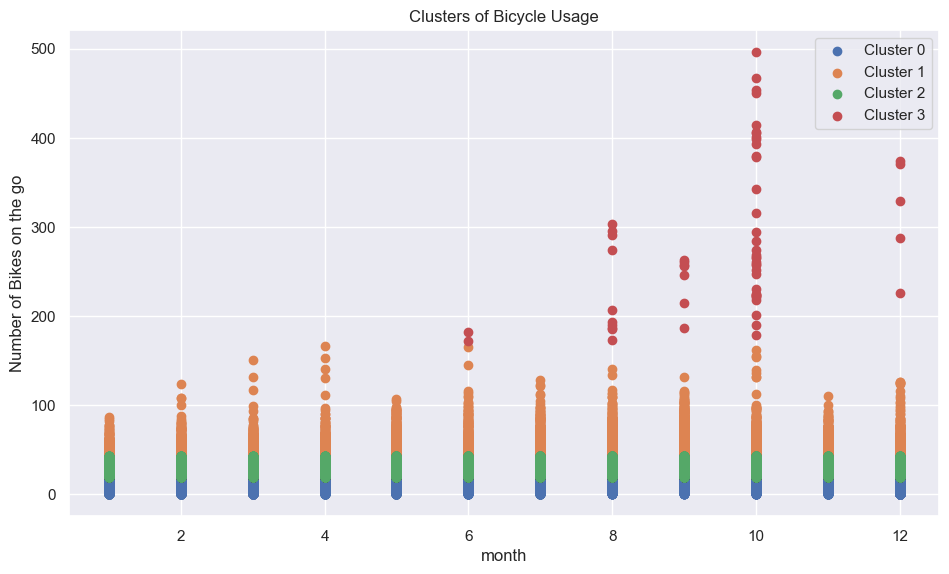

In [49]:
# plotting 'month' against 'bikes_on_the_go' colored by cluster
plt.figure(figsize=(10, 6))
for cluster_num in range(4):
    cluster_data = new_hourly_data[new_hourly_data['cluster'] == cluster_num]
    plt.scatter(cluster_data['month'], cluster_data['bikes_on_the_go'], label=f'Cluster {cluster_num}')
plt.xlabel('month')
plt.ylabel('Number of Bikes on the go')
plt.legend()
plt.title('Clusters of Bicycle Usage')
plt.show()

# Identifying Cluster of Interest
Here, we decided to choose a combination of clusters 1 and 3. The visualization, show that the data in these clusters predominantly occurred at specific times of the day, notably at 10 AM and 6 PM. Also the higher peaks occur on sundays, and in August, September and October.

Additionally, upon comparing the distribution of data in these clusters to the original dataset, we observed that the number of bikes on the go within these chosen clusters tended to be higher than that of both the other clusters and the original dataset as a whole.

In [50]:
peak_data = new_hourly_data[(new_hourly_data['cluster'] == 3) | (new_hourly_data['cluster'] == 1)] 
peak_data.head()

,date,year,month,day_of_week,is_weekend,public_holiday,covid_lockdown,hour_of_day,bikes_on_the_go,prediction,cluster
timestamp,,,,,,,,,,,
2016-08-06 12:00:00,2016-08-06,2016,8,5,True,False,False,12,53,NaN,1
2016-08-06 15:00:00,2016-08-06,2016,8,5,True,False,False,15,47,NaN,1
2016-08-06 16:00:00,2016-08-06,2016,8,5,True,False,False,16,49,NaN,1
2016-08-07 14:00:00,2016-08-07,2016,8,6,True,False,False,14,46,NaN,1
2016-08-07 17:00:00,2016-08-07,2016,8,6,True,False,False,17,48,NaN,1


In [51]:
peak_data.bikes_on_the_go.describe()

count    4619.000000
mean       61.598181
std        30.541306
min        44.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       496.000000
Name: bikes_on_the_go, dtype: float64

In [52]:
peak_data.bikes_on_the_go.describe()

count    4619.000000
mean       61.598181
std        30.541306
min        44.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       496.000000
Name: bikes_on_the_go, dtype: float64

In [53]:
new_hourly_data['peak'] = 0
for index, row in peak_data.iterrows():
    if index in new_hourly_data.index:
        new_hourly_data.loc[index, 'peak'] = 1
        
new_hourly_data.head()

,date,year,month,day_of_week,is_weekend,public_holiday,covid_lockdown,hour_of_day,bikes_on_the_go,prediction,cluster,peak
timestamp,,,,,,,,,,,,
2016-07-07 04:00:00,2016-07-07,2016,7,3,False,False,False,4,0,NaN,0,0
2016-07-07 06:00:00,2016-07-07,2016,7,3,False,False,False,6,0,NaN,0,0
2016-07-07 10:00:00,2016-07-07,2016,7,3,False,False,False,10,1,NaN,0,0
2016-07-07 12:00:00,2016-07-07,2016,7,3,False,False,False,12,4,NaN,0,0
2016-07-07 13:00:00,2016-07-07,2016,7,3,False,False,False,13,10,NaN,0,0


# Prediction of peak periods
We understand that it is not just the hour of the day that determines whether the bikes on the go is at its peak. It should a combination of features that do so. Additionally, before the company predicts the bikes on the go at certain periods, it must first know whether that time is a peak period.

In [54]:
def print_metrics(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    print('True Positive Rate = ' + str(TPR))
    print('False Positive Rate = ' + str(FPR))

In [55]:
train = new_hourly_data.loc[hourly_data.index < '01-01-2023']
test = new_hourly_data.loc[hourly_data.index >= '01-01-2023']

features = ['month', 'day_of_week', 'hour_of_day', 'is_weekend', 'public_holiday', 'covid_lockdown']
target = 'peak'

X_train = train[features]
Y_train = train[target]

X_test = test[features]
Y_test = test[target]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9533037887318827

For Train Data:
True Positive Rate = 0.19182948490230906
False Positive Rate = 0.005665830829010585

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8017062485589117


For Test Data:
True Positive Rate = 0.05044345898004435
False Positive Rate = 0.0010189228529839884


<Axes: >

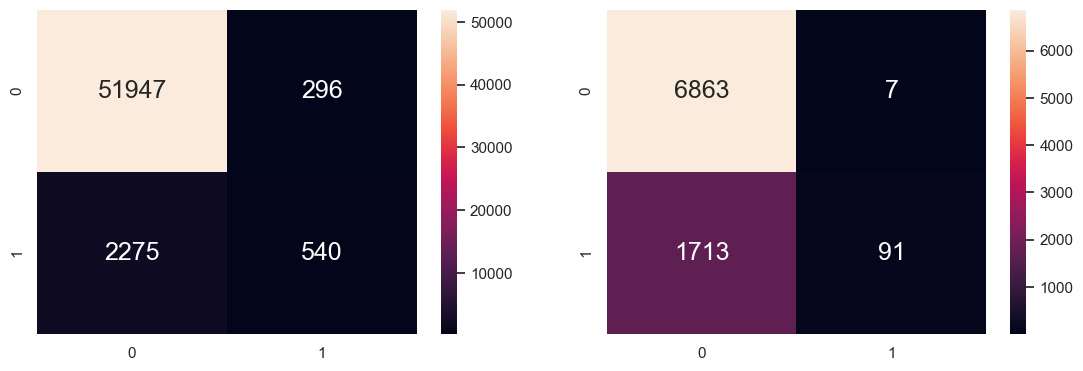

In [56]:
# Perform one-hot encoding for categorical features
X_train_encoded = pd.get_dummies(X_train, columns=['month', 'day_of_week'])
X_test_encoded = pd.get_dummies(X_test, columns=['month', 'day_of_week'])

# Train the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=25, random_state=42)
decision_tree.fit(X_train_encoded, Y_train)

# Make predictions on train and test data
Y_train_pred = decision_tree.predict(X_train_encoded)
Y_test_pred = decision_tree.predict(X_test_encoded)

# Check the Goodness of Fit
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(Y_train, Y_train_pred))
print()

print("For Train Data:")
print_metrics(Y_train, Y_train_pred)

# Check the Goodness of Fit on Test Data
print("\nGoodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(Y_test, Y_test_pred))
print()

print("\nFor Test Data:")
print_metrics(Y_test, Y_test_pred)

# Visualize confusion matrices
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Confusion Matrix for Train data on the left, for Test data on the right.

Through further investigation, we found that 2023, our test set had the largest proportion of peak data. The other years had fewer instances of peak data, which was the most important feature for prediction. This likely resulted in a less satisfactory prediction performance.

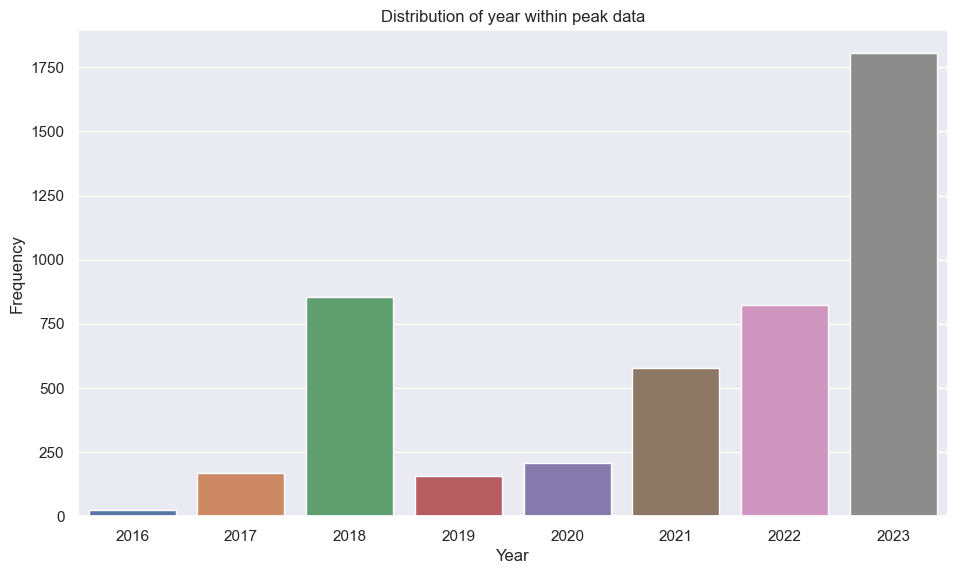

In [57]:
frequency = peak_data['year'].value_counts(normalize=True)
plt.figure(figsize=(10, 6))
sb.countplot(x='year', data=peak_data)
plt.title("Distribution of year within peak data")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

As we are concerned about identifying peak periods, the extremely low true positive rate here is very concerning. Because it reflects oversight on a lot of the identification of peak periods. There must be other factors like to identify peak periods which we are missing. Some might include the weather (which must also be predicted by the company first), economical factors (which is more complex, like inflation of alternatives like cars, public transport) or whether it is a school holiday. 

We understand that we could have also used anomaly detection instead of K-Means to decide on the peak data, however K-means clustering allowed us to partition and choose the peak data manually.

# Peak Hours feature for bikes on the go prediction

From the previous visualisation for the prediction of bikes on the go, we could see that the hour of the day is the most important feature for prediction. Let us use the characteristic of the hour of the day in the peak cluster to classify peak hours instead. 

In [58]:
new_hourly_data.drop(['peak', 'prediction', 'cluster'], axis=1, inplace=True)
new_hourly_data['peak_hour'] = 0
new_hourly_data.head()

,date,year,month,day_of_week,is_weekend,public_holiday,covid_lockdown,hour_of_day,bikes_on_the_go,peak_hour
timestamp,,,,,,,,,,
2016-07-07 04:00:00,2016-07-07,2016,7,3,False,False,False,4,0,0
2016-07-07 06:00:00,2016-07-07,2016,7,3,False,False,False,6,0,0
2016-07-07 10:00:00,2016-07-07,2016,7,3,False,False,False,10,1,0
2016-07-07 12:00:00,2016-07-07,2016,7,3,False,False,False,12,4,0
2016-07-07 13:00:00,2016-07-07,2016,7,3,False,False,False,13,10,0


In [59]:
new_hourly_data['peak_hour'] = 0
new_hourly_data.head()

,date,year,month,day_of_week,is_weekend,public_holiday,covid_lockdown,hour_of_day,bikes_on_the_go,peak_hour
timestamp,,,,,,,,,,
2016-07-07 04:00:00,2016-07-07,2016,7,3,False,False,False,4,0,0
2016-07-07 06:00:00,2016-07-07,2016,7,3,False,False,False,6,0,0
2016-07-07 10:00:00,2016-07-07,2016,7,3,False,False,False,10,1,0
2016-07-07 12:00:00,2016-07-07,2016,7,3,False,False,False,12,4,0
2016-07-07 13:00:00,2016-07-07,2016,7,3,False,False,False,13,10,0


In [60]:
cutoff_date = datetime.strptime('01-01-2023', '%m-%d-%Y').date()
train_peak_data = peak_data[peak_data.date < cutoff_date]

train_peak_data.head()

,date,year,month,day_of_week,is_weekend,public_holiday,covid_lockdown,hour_of_day,bikes_on_the_go,prediction,cluster
timestamp,,,,,,,,,,,
2016-08-06 12:00:00,2016-08-06,2016,8,5,True,False,False,12,53,NaN,1
2016-08-06 15:00:00,2016-08-06,2016,8,5,True,False,False,15,47,NaN,1
2016-08-06 16:00:00,2016-08-06,2016,8,5,True,False,False,16,49,NaN,1
2016-08-07 14:00:00,2016-08-07,2016,8,6,True,False,False,14,46,NaN,1
2016-08-07 17:00:00,2016-08-07,2016,8,6,True,False,False,17,48,NaN,1


In [61]:
num_bins = 24  # 24 hours in a day

# Bin the hours into intervals
hourly_bins = pd.cut(train_peak_data['hour_of_day'], bins=num_bins, include_lowest=True)

# Calculate the count of data points in each interval
hourly_counts = hourly_bins.value_counts().sort_index()

# Find the bin(s) with the highest count
most_common_bins = hourly_counts[hourly_counts == hourly_counts.max()].index

print("The range of hours - 1st quartile to 3rd quartile:")
for bin_range in most_common_bins:
    print(bin_range)

The range of hours - 1st quartile to 3rd quartile:
(14.875, 15.5]


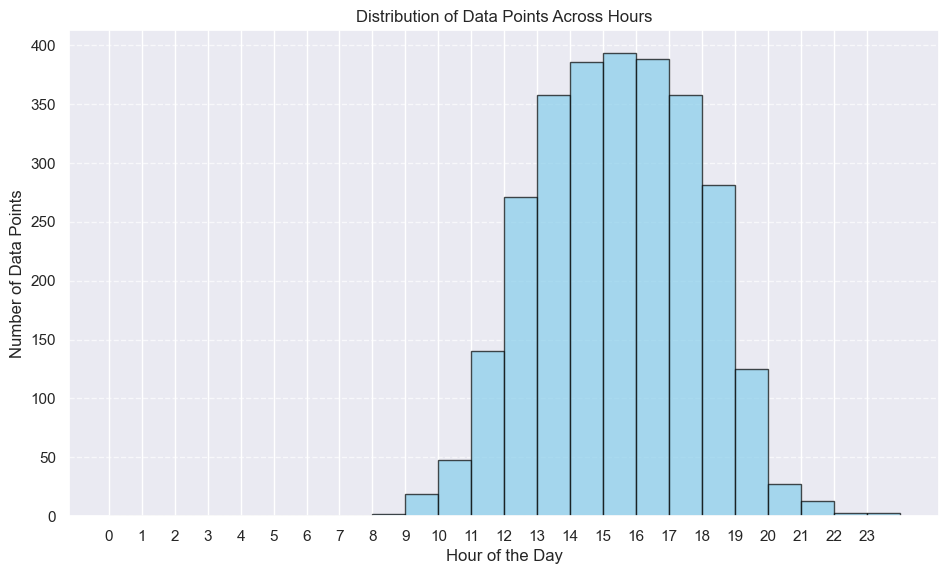

In [62]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(train_peak_data['hour_of_day'], bins=range(25), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Data Points Across Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Data Points')
plt.xticks(range(24))  # Set the ticks to represent each hour
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on this analysis, it would be save to consider 1400 to 1600 hrs as peak hours.

In [63]:
for index, row in new_hourly_data.iterrows():
    if index.hour >= 14 and index.hour < 16:
        if index in new_hourly_data.index:
            new_hourly_data.loc[index, 'peak_hour'] = 1

new_hourly_data.head(n=10)

,date,year,month,day_of_week,is_weekend,public_holiday,covid_lockdown,hour_of_day,bikes_on_the_go,peak_hour
timestamp,,,,,,,,,,
2016-07-07 04:00:00,2016-07-07,2016,7,3,False,False,False,4,0,0
2016-07-07 06:00:00,2016-07-07,2016,7,3,False,False,False,6,0,0
2016-07-07 10:00:00,2016-07-07,2016,7,3,False,False,False,10,1,0
2016-07-07 12:00:00,2016-07-07,2016,7,3,False,False,False,12,4,0
2016-07-07 13:00:00,2016-07-07,2016,7,3,False,False,False,13,10,0
2016-07-07 14:00:00,2016-07-07,2016,7,3,False,False,False,14,9,1
2016-07-07 15:00:00,2016-07-07,2016,7,3,False,False,False,15,3,1
2016-07-07 16:00:00,2016-07-07,2016,7,3,False,False,False,16,9,0
2016-07-07 17:00:00,2016-07-07,2016,7,3,False,False,False,17,7,0


# Creating new Model for bikes on the go prediction

In [64]:
train = new_hourly_data.loc[new_hourly_data.index < '01-01-2023']
test = new_hourly_data.loc[new_hourly_data.index >= '01-01-2023']

features = ['year', 'month', 'day_of_week', 'hour_of_day', 'is_weekend', 'public_holiday', 'covid_lockdown', 'peak_hour']
target = 'bikes_on_the_go'

X_train = train[features]
Y_train = train[target]

X_test = test[features]
Y_test = test[target]

In [65]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth= 7,
                       learning_rate=0.01)
reg.fit(X_train, Y_train,
        eval_set=[(X_train, Y_train), (X_test, Y_test)],
        verbose=100)

[21:51:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:22.43113	validation_1-rmse:35.16233
[100]	validation_0-rmse:13.17091	validation_1-rmse:22.36461
[200]	validation_0-rmse:10.92180	validation_1-rmse:18.01845
[300]	validation_0-rmse:10.32033	validation_1-rmse:16.44578
[400]	validation_0-rmse:10.02937	validation_1-rmse:15.82439
[500]	validation_0-rmse:9.88819	validation_1-rmse:15.57240
[600]	validation_0-rmse:9.78788	validation_1-rmse:15.44087
[700]	validation_0-rmse:9.71705	validation_1-rmse:15.36805
[800]	validation_0-rmse:9.67393	validation_1-rmse:15.34365
[900]	validation_0-rmse:9.62760	validation_1-rmse:15.32750
[988]	validation_0-rmse:9.58139	validation_1-rmse:15.32623


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

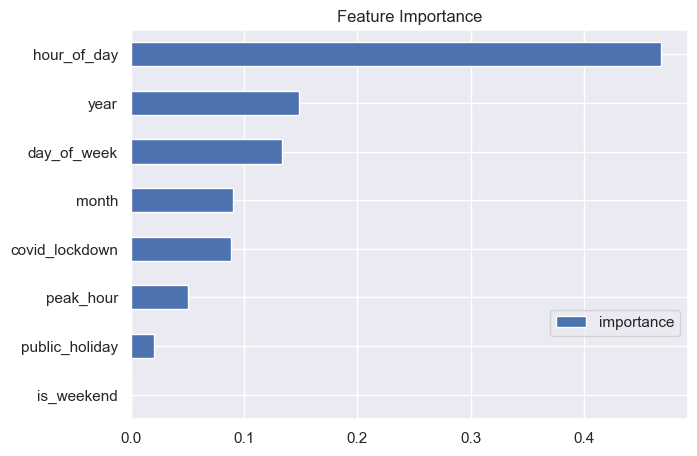

In [66]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.legend(bbox_to_anchor = (1, 0.3))
plt.show()

/var/folders/hx/0wt7j0md7ld6cq4m77bhf6w80000gn/T/ipykernel_19323/3834305339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


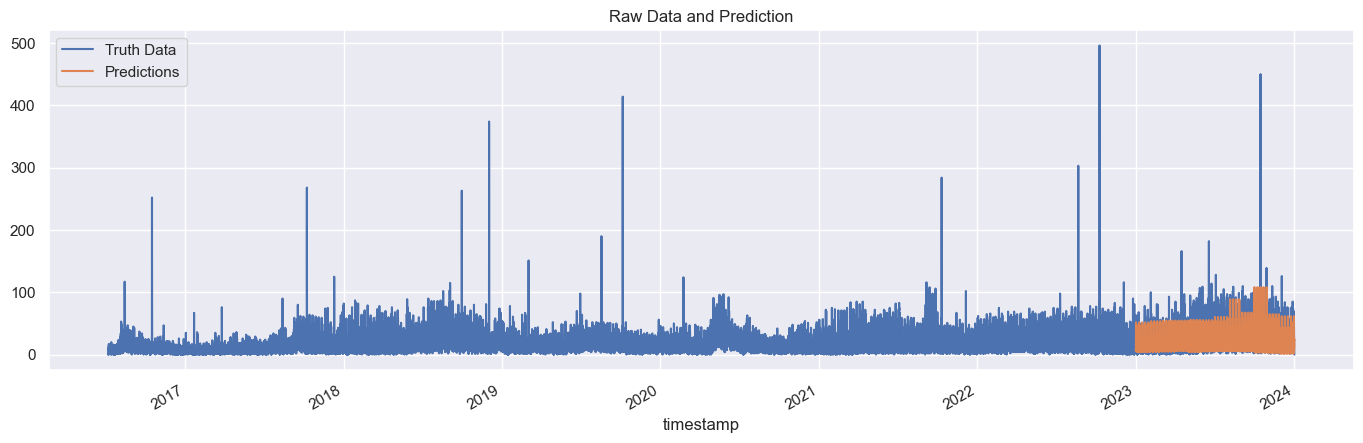

In [67]:
test['prediction'] = reg.predict(X_test)
new_hourly_data = new_hourly_data.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = new_hourly_data[['bikes_on_the_go']].plot(figsize=(15, 5))
new_hourly_data['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

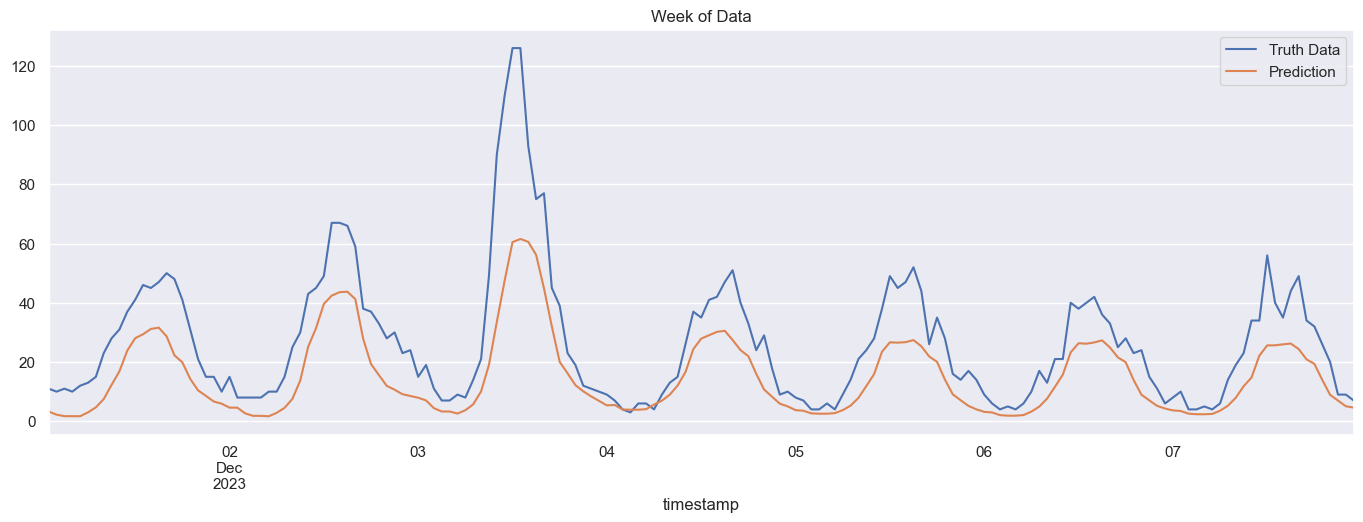

In [68]:
ax = new_hourly_data.loc[(new_hourly_data.index > '12-01-2023') & (new_hourly_data.index < '12-08-2023')]['bikes_on_the_go'] \
    .plot(figsize=(15, 5), title='Week of Data')
new_hourly_data.loc[(new_hourly_data.index > '12-01-2023') & (new_hourly_data.index < '12-08-2023')]['prediction'] \
    .plot()
plt.legend(['Truth Data','Prediction'])
plt.show()

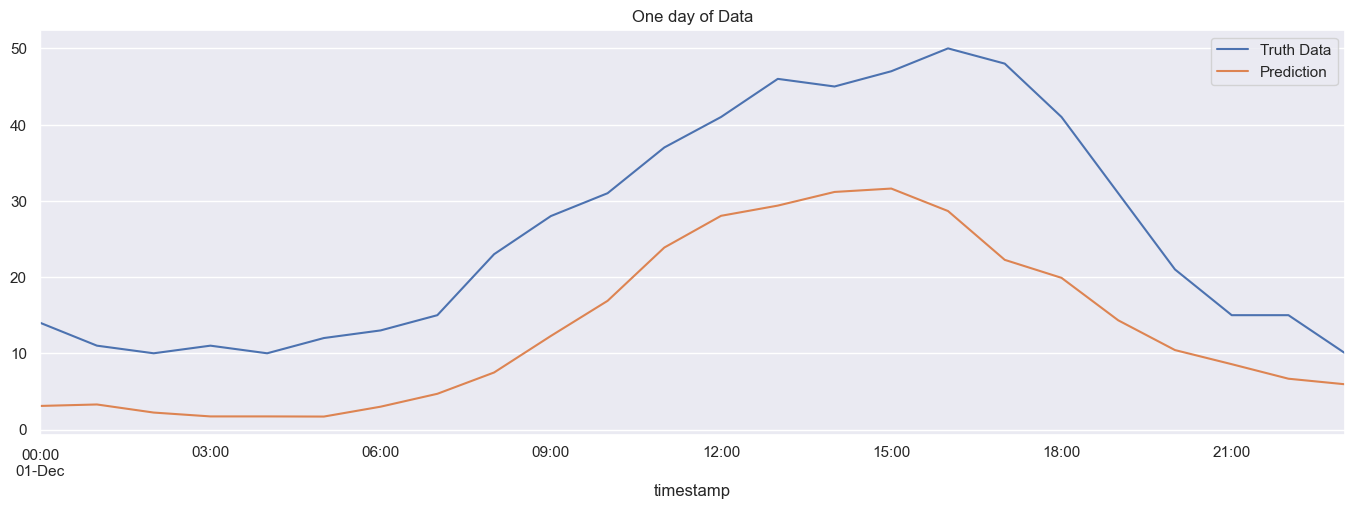

In [69]:
ax = new_hourly_data.loc[new_hourly_data.index.date == datetime.strptime('12-01-2023', '%m-%d-%Y').date()]['bikes_on_the_go'] \
    .plot(figsize=(15, 5), title='One day of Data')
new_hourly_data.loc[new_hourly_data.index.date == datetime.strptime('12-01-2023', '%m-%d-%Y').date()]['prediction'] \
    .plot()
plt.legend(['Truth Data', 'Prediction'])
plt.show()

In [70]:
MSE = mean_squared_error(test['bikes_on_the_go'], test['prediction'])
RMSE = np.sqrt(mean_squared_error(test['bikes_on_the_go'], test['prediction']))
print("Goodness of fit on test set")
print(f'RMSE Score on Test set: {RMSE:0.2f}')
print(f'MSE Score on Test set: {MSE:0.2f}')

Goodness of fit on test set
RMSE Score on Test set: 15.32
MSE Score on Test set: 234.80


In [71]:
# Calculate R^2 score
r2 = r2_score(test['bikes_on_the_go'], test['prediction'])
print("Goodness of fit on train set")
print(f'R^2 Score on Test set: {r2:0.2f}')

Goodness of fit on train set
R^2 Score on Test set: 0.59


There is a small improvement on the accuracy of prediction when we add the new feature of peak hour. Seen in the improvements: (Lower RMSE, higher R^2)

However, we must consider that peak is more of a concept on the behaviour of a variable, rather than a feature.

As mentioned, there will also be more variables like the weather and economic factors that will need primary predictions, which will affect whether the number of bikes on the go will be considered as peak and ultimately value of the number of bikes on the go.


# Conclusion
Predicting the number of bikes on the go is beneficial to the company because they will be able to gauge how many bicycles they need to produce/ maintain to meet the demands of the users and maximise their revenue. They do not want to oversupply as that will incur additional manufacturing costs and cut on their profits.

After predicting the number of bikes that is needed to be supplied/ maintained, the next step for the company would be to decide on the allocation of these bikes to stations, especially the popular ones, where most trips start. These spots drives the revenue of the company. They will hence be able to decide where and when to place bicyles, or when to move bicycles from one station to a popular station.

Moving foward, we recommend that the company studies to find the features that are more important to accurately predict the number of bikes to supply and allocate. (Examples mentioned earlier - weather, economic factors)

The company can also conduct similar analysis on demand, to decide for example, on when to give out promotions.  (Taking note of the number or trips started per hour).